# Problem: Scraping data from Inshorts and using that data to classify general news

## Classifying news in 5 categories

## Likhit Jha 

In [1]:
from selenium import webdriver

In [40]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [163]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Importing 
import pandas as pd
#The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
from sklearn.multiclass import OneVsRestClassifier

# classifers being used
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

#importing word cloud for visualisation 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for train test-test classifier
from sklearn.model_selection import train_test_split
# for accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

### Out of the several categories in Inhorts, we select these 5 categories,
### We will be scraping the news card content from the inshorts website

Science

Sports

Politics

Entertainment

Business

In [2]:
## Use the scraping code to scrape and store data from each category one by one

### SCRAPING DATA FROM INSHORTS

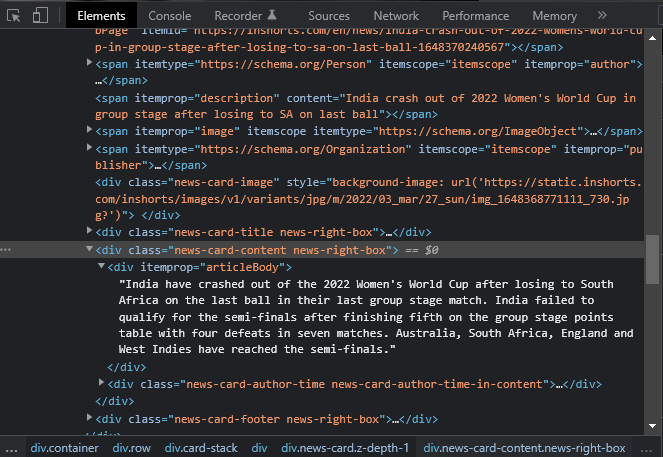
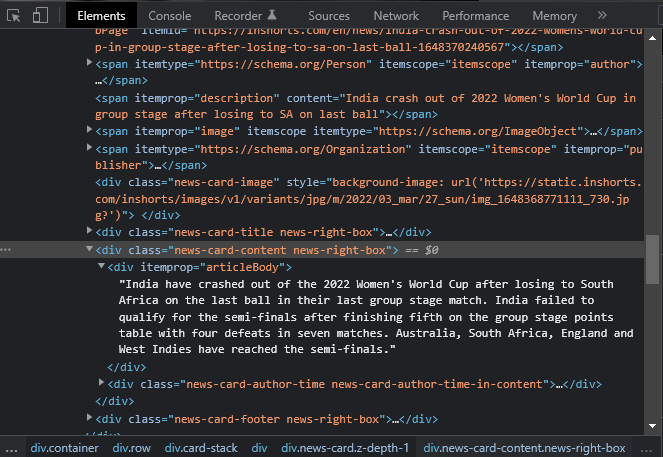

In [222]:
import requests
from bs4 import BeautifulSoup
import json
#Set cat, it is a string that takes in category of news 
cat='business'



df1 = pd.DataFrame(columns = ['Title', 'Content'])
def print_headlines(response_text):
    import time
    df = pd.DataFrame(columns = ['Title', 'Content'])
    soup = BeautifulSoup(response_text, 'lxml')
    newsCards = soup.find_all(class_='news-card')
    newsDictionary = {
        'success': True,
        'data': []
    }
    i=0
    for card in newsCards:
        try:
            title = card.find(class_='news-card-title').find('a').text
        except AttributeError:
            title = None

        try:
            imageUrl = card.find(
                class_='news-card-image')['style'].split("'")[1]
        except AttributeError:
            imageUrl = None

        try:
            url = ('https://www.inshorts.com' + card.find(class_='news-card-title')
                   .find('a').get('href'))
        except AttributeError:
            url = None

        try:
            content = card.find(class_='news-card-content').find('div').text
        except AttributeError:
            content = None

        try:
            author = card.find(class_='author').text
        except AttributeError:
            author = None

        try:
            date = card.find(clas='date').text
        except AttributeError:
            date = None

        try:
            time = card.find(class_='time').text
        except AttributeError:
            time = None

        try:
            readMoreUrl = card.find(class_='read-more').find('a').get('href')
        except AttributeError:
            readMoreUrl = None

        newsObject = {
            'title': title,
            'content': content,
        }
        print(newsObject['title'])
        df = df.append({'Title' : newsObject['title'], 'Content' : newsObject['content'] , 'Category' : cat}, 
                ignore_index = True)
        newsDictionary['data'].append(newsObject)
    #print(newsDictionary['data'])
    print(df)
    return df


def get_headers(): #specified in the network section
    return {
        "accept": "*/*",
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "en-IN,en-US;q=0.9,en;q=0.8",
        "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
        "cookie": "_ga=GA1.2.474379061.1548476083; _gid=GA1.2.251903072.1548476083; __gads=ID=17fd29a6d34048fc:T=1548476085:S=ALNI_MaRiLYBFlMfKNMAtiW0J3b_o0XGxw",
        "origin": "https://inshorts.com",
        "referer": "https://www.inshorts.com/en/read/"+cat,
        "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",
        "x-requested-with": "XMLHttpRequest"
    }


url = 'https://inshorts.com/en/read/'+cat
response = requests.get(url)
print_headlines(response.text)

# get more news
url = 'https://inshorts.com/en/ajax/more_news'
news_offset = "06ir0ujk-1"     #change the offset acording to the offset specified for that category

while True:
    response = requests.post(url, data={"category": cat, "news_offset": news_offset}, headers=get_headers())
    if response.status_code != 200:
        print(response.status_code)
        break

    response_json = json.loads(response.text)
    df1=df1.append(print_headlines(response_json["html"]))
    news_offset = response_json["min_news_id"]


What are the major announcements made in Delhi Budget 2022-23?


Petrol, diesel prices hiked for 5th time in 6 days


Petrol, diesel prices hiked for 6th time in 7 days


Which services are likely to be hit due to Bharat Bandh on March 28 & 29?


PVR & INOX announce merger, combined entity to be called PVR INOX Limited


My firm's executives are afraid to meet me personally: Sanctioned Russian oligarch


Insurance firm removes its 'Z' logo from social media amid Russia-Ukraine war


I'm not afraid of dying, it would come as a relief: World's richest person Musk


Let's make the local 'global': PM Modi on Indian exports


$400 billion exports record signifies India's potential, capabilities: PM Modi


Prices of over 800 essential medicines set to increase by 10.7% from April


What are the petrol prices in metro and other cities after 5th hike in 6 days?


Users tweet videos of some McDonald's outlets still open in Russia


Biden to propose new 'billionaire's tax' in 2023 budget plan: 


What could become costlier in India due to the war in Ukraine?


Indian firms may replace Western pharma companies leaving Russian market: Russia


I-T dept makes highest tax collection in its history in 2021-22


Ukrainian CEO featured in Forbes' rich list stays behind in Kharkiv to help rescuers


Russian fast-food chain reveals logo nearly identical to McDonald's


Want to shut all 800 restaurants but our Russian partner refused: Burger King owner


LG suspends all shipments to Russia amid war with Ukraine


'Skip Intro' button used 136 mn times a day, saves users’ 195 years: Netflix


₹2,000 cash found at unicorn founder's home after 3-day I-T raid on Infra.Market


This looks superb and so inviting: Mahindra on pics of new highway in Manipur


India & Sri Lanka sign agreement for a $1-billion line of credit


Quess Corp Founder donates ₹105 cr to IISc to set up centre for public health


Smoke from a huge fire at Walmart warehouse in US visible from space


Ukrainian bridal gown 


Govt has no plans to introduce cryptocurrency: MoS Finance


Zomato loans $150 mn to Blinkit, buys 16.66% stake in Mukunda Foods for $5 mn


India's urban unemployment rate jumped to 12.6% in Apr-Jun 2021 amid 2nd wave


Elon Musk changes his Twitter name to 'Elona' as Putin's ally calls him effeminate 


It'll be support for invasion: US on if India buys discounted crude oil from Russia


Russia threatened to arrest McDonald's, IBM execs who criticised govt: WSJ


India buying discounted crude oil from Russia does not violate US sanctions: US


Tata Communications becomes Formula 1's official broadcast connectivity provider 


Chinese stocks jump the most since 2008 after $1.5 tn wiped out in two days


Alibaba, Tencent lose over $1 trillion in market value over a year


Russia's space chief, who called Musk 'little devil', invited him home 6 months ago


Paytm CEO Vijay Shekhar Sharma briefly loses billionaire status


Paytm share price drops 71% from IPO price; out of BSE top-100 m


I hereby challenge Putin to single combat, stakes are Ukraine: Elon Musk


Do you agree to this fight?: Musk to Putin after challenging him to single combat for Ukraine


I still own & won't sell my Bitcoin, Ethereum or Doge: Elon Musk


Retail inflation rises to 8-month-high of 6.07% in February 2022


Tata Sons chief N Chandrasekaran appointed as Air India chairman


How could you say no to this?: Rishad Premji on US author's letter to Monroe


Russia offering oil at heavy discount, India looking to buy it: Report


iPhone supplier Foxconn halts production in China's Shenzhen amid COVID-19 curbs


Do not fear: Sea's secretive billionaire CEO to staff on tech firm losing $150 bn value


I was there, police were in awe of his humility: Innov8 founder on Paytm CEO's arrest


Completely false: Paytm Payments Bank on report of leaking data to Chinese firms


Have no server outside India: CEO denies report of Paytm Payments Bank data leak


Paytm shares fall to all-time low of ₹672 after 


Rihanna planning IPO for her lingerie company at $3 billion valuation: Report


Kim says 'get your f***ing a** up and work' to women in business; criticised


Russia bans export of 200 products till end of 2022 amid sanctions


Food prices will rise globally: Putin on western sanctions on Russia amid war


Japan Tobacco, the largest cigarette maker in Russia, suspends Russia investments


Goldman Sachs becomes the first major US bank to exit Russia


No global firm can touch Russia's blood money, thank you Mastercard: Ukraine Vice PM


Tesla to pay salary for 3 months to Ukrainian employees called to fight Russia


33-yr-old Indian-American among 2 indicted in US for crypto money laundering


SBI app users spammed with random notifications, bank says fixing issue


Shark Tank India judge Ghazal Alagh welcomes 2nd baby, calls him 'baby shark'


Better.com CEO Vishal Garg offers to cover insurance for fired expecting parents


Social media users criticise Ola for its '8 missed calls fro


After McDonald's, Coca-Cola, Pepsi & Starbucks suspend business in Russia


McDonald's temporarily shuts Russian restaurants, says 'can't ignore suffering in Ukraine'


Russia's rating cut for 2nd time in a week by Fitch


Shell to stop buying oil, gas from Russia, apologises for buying cargo after invasion


Russian oil ban will be catastrophic, prices could hit $300 a barrel: Deputy PM


1 Russian ruble now worth less than 1 American penny: US President Biden


How will the new UPI work on feature phones and in offline mode?


RBI launches UPI for feature phones; transactions won't require internet


RBI launches 24/7 helpline 'DigiSaathi' for digital payment queries


We're sorry, we messed up: Flipkart on 'Get kitchen appliances' text on Women's Day


Better.com, that fired 900 staff on Zoom, plans laying off 4,000 this week: Report


I'm the healthiest person I know & I got breast cancer: Zerodha Co-founder's wife


We both went bald: Zerodha Co-founder's wife on their pic amid h


Mother Dairy to hike milk prices by ₹2 per litre in Delhi-NCR from tomorrow


We're too big to be isolated: Russia on sanctions over Ukraine war


I'm grateful to Musk for supporting Ukraine in words and deeds: Zelenskyy


Doesn't it smell of Ukrainian blood?: Ukraine as Shell buys Russian oil


Zelenskyy invites world's richest man Elon Musk to visit Ukraine; shares video


Singapore sanctions 4 Russian banks; bans military goods, computers export


Hundreds book Airbnbs in Ukraine to send money to citizens amid war


Western sanctions on Russia are akin to declaration of war: Putin


Putin's war has always been a war against his own people: Branson


I find it difficult to meditate, I use NSDR to relax: Google CEO Sundar Pichai


Ratan Tata always keeps his promises: 28-yr-old assistant lists 2 of Tata's values


CCI dismisses predatory pricing claims against e-commerce firm Shopee


Madhya Pradesh govt increases DA for state govt employees to 31%


CBI court refuses anticipatory ba



Amazon gods will have to come down to talk to us mortals: Future Retail in SC


Ex-Nissan exec found guilty of helping ex-CEO hiding compensation


World's largest yacht worth ₹4,500 cr seized by Germany from Russian billionaire: Reports


How can Indian investors trade in US stocks like Tesla through NSE IFSC? 


I had no idea there was such a shortfall of medical colleges in India: Mahindra


Mukesh Ambani's $89.9 bn fortune nearly equals Russia's 4 richest men combined


Tesla, Google, Apple & 5 other US stocks to begin trading on NSE IFSC today


Ikea suspends Russia, Belarus operations; 15,000 staff to be affected


Oracle suspends operations in Russia, SAP pauses sales


YouTube's creators contributed ₹6,800 cr to Indian GDP in 2020: Report


Representations on crypto regulations have been made to govt: Ex-SEBI chief


India trying to increase its footprint in international gaming sector: PM Modi


Palihapitiya accused of insider sale of Virgin Galactic shares worth $315 mn


1



I challenge you to run this company better without me: Ashneer to BharatPe board


You treat founders as slaves, cut us down at will: Ashneer to BharatPe investors


Price of 19 kg commercial LPG cylinder increased by ₹105 in Delhi from today


Russia bans residents from transferring money abroad from March 1


Estée Lauder fires senior exec Demsey for posting racist meme on Instagram


Who is Madhabi Puri Buch, the first-ever woman to head SEBI?


Amul increases price for milk across India by ₹2 per litre


After Amul, Gowardhan milk prices increased by ₹2 per litre


Old income tax regime with deductions must go: Revenue Secretary Tarun Bajaj


India's GDP growth slows to 5.4% in Q3 of FY22 compared to 8.4% in Q2


$2.4-bn fraud accused Indian founder of BitConnect has disappeared: US regulator


US bans transactions with Russian central bank, National Wealth Fund


GM, Harley-Davidson halt shipments to Russia amid ongoing war


SC to hear Cyrus Mistry's appeal to drop its remarks 


EU announces sanctions targeting 70% of Russian banking market, key govt-led firms


Delhi approves Film Policy 2022, to give ₹3 cr subsidy for film production


Air India to operate 2 flights to bring back Indians stuck in Ukraine


Russian billionaires lost $39 billion in 1 day after Ukraine invasion


Is crypto illegal or not? Make your stand clear: Supreme Court to govt


Indian economy to be among worst hit in Asia amid Russia-Ukraine war: Nomura


S&P cuts Russia's credit rating to 'junk' amid Ukraine invasion


Nestlé, Carlsberg, Coca-Cola among firms to shut operations in Ukraine


My family's hearing sirens, explosions & they don't know what to do: Ukrainian CEO


Putin must be held accountable, his assets should be frozen: Richard Branson


Indian founder of BitConnect indicted for running $2.4 bn crypto ponzi scheme


What is SWIFT, the financial system from which Russia could be cut off?


Will be supporting local humanitarian efforts in Ukraine: Apple CEO Tim Cook


Musk'



Ashneer's wife shares alleged audio clip of BharatPe's Koladiya abusing Ashneer


Nykaa settles suit with L'Oreal over IP rights infringement after 2 yrs


Biden's aides feared US sanctions won't stop Putin from attacking Ukraine: Report


Oil hits $100 a barrel for 1st time since 2014 as Ukraine crisis escalates


Russia-Ukraine crisis wiped out ₹8 lakh crore from Indian markets in 1st hour


Ambani says 'India will emerge as global New Energy leader'; gives 3 reasons


Russia-Ukraine war may hit commodities beyond oil and gas: Raghuram Rajan


Reliance took 15 yrs to become a $1 bn company, 38 yrs to hit $200 bn: Ambani


Nooyi shares account from 2009 when both Obama, Manmohan Singh said 'she's one of us'


Bharti Airtel acquires strategic stake in blockchain startup Aqilliz


India to have 1 billion smartphone users by 2026: Deloitte study


Will visit IRS just to say hi: Musk as Warren discusses his taxes


RBI's view may have delayed crypto bill: Deputy Governor


India's fuel 



Vedant Fashions shares fall below IPO price for 1st time since listing


Can't compare profits of insurers with manufacturing firms: LIC Chairman

                                                Title  \
0   \nBachchan family, Hema Malini and others atte...   
1   \nCadila Healthcare shares fall as Biological ...   
2   \nPorsches, Lamborghinis on ship burning mid-o...   
3   \nAshneer files arbitration plea, calls Bharat...   
4   \nChina asks biggest state-owned banks to repo...   
5   \nAir India flight gets water salute in Maldiv...   
6   \nWoman told to remove hijab at UCO Bank branc...   
7   \nIDFC FIRST Bank MD gifts shares worth ₹3.95 ...   
8   \nBlackmailers circulating same complaints for...   
9   \nIndian investors lose ₹9.1 lakh crore amid R...   
10  \nVedanta makes oil discovery in Rajasthan's B...   
11  \nSensex crashes 1,000 points, Nifty below 16,...   
12  \nFraudster Madoff's sister, her husband found...   
13  \nAlibaba leads China tech stocks drop amid re...


Which countries are preferred by India's millionaires for their kids' education?


Meta falls from ranks of world's 10 most valuable companies 


I became the world's richest man for 7 minutes, overtook Elon Musk: YouTuber


Which are now the world's 10 most valuable firms as Meta loses ranking?


LIC likely to launch ₹59,760 crore IPO on March 11: Reports


Met 'yogi' 20 yrs ago on banks of Ganges: Ex-NSE chief Chitra Ramkrishna told SEBI


You must learn different ways to plait your hair: 'Yogi' told ex-NSE chief Chitra


My father, Tatas, Winston Churchill: Rakesh Jhunjhunwala on his role models


IndiGo Co-founder Rakesh Gangwal resigns from board, will cut down stake


Planning Seychelles trip, we can enjoy sea bath: 'Yogi' to ex-NSE CEO in e-mail


Names of 3 Indian cities with the most millionaire households released by Hurun


Hurun survey shows brands preferred by Indian millionaires; Mercedes top car brand


I'm prepared for failure: Rakesh Jhunjhunwala on starting Akasa Air


Infosys to hire 55,000 or more freshers in FY23: CEO Salil Parekh


Chinese company Huawei's premises in India raided by Income Tax Dept: Reports


Tesla needs to buy $500 million of local parts in India to get import tax cut: Report


Ratan Tata honoured with Assam's highest civilian award; CM shares pics


Dated Brent, main price benchmark for physical crude, hits $100 amid Ukraine crisis


Yes Bank Co-founder Rana Kapoor gets bail in ₹300-crore fraud case


Kiran Mazumdar-Shaw, Mohandas Pai argue on Twitter over 'yogi ran NSE' report


I left Bihar with a tiffin & dreams in my eyes: Billionaire Agarwal on moving to Mumbai


Ex-NSE MD accused of sharing info with Himalayan 'yogi' raided by I-T dept: Reports


There's no such thing as balancing work, family: Indra Nooyi in note for husband


Just another day in the markets, not for faint-hearted: Mahindra on rollercoaster video


LIC to raise ₹65,400 crore in India's largest-ever IPO: Reports


Australian whisky firm's CEO quits afte


Berkshire bought Activision's $1 bn worth shares before Microsoft takeover


Banning cryptocurrency most advisable choice open to India: RBI Deputy Governor


Not justified to say crypto ban will cause losses: RBI's Deputy Governor


Musk donates $5.7 billion of Tesla shares, one of the biggest to charity in history


Better.com's Zoom layoffs in US added 1,000 employees for the firm in India


Paytm CEO's stake value falls below $1 billion as stock hits new low


 Hiranandani Group to invest ₹3,500 cr in in-house platform Tez


Zomato shares dip below IPO price for 1st time since listing in July


Mamaearth's parent company Honasa Consumer acquires BBLUNT


No wonder he was so loved: Sonia Gandhi in letter to Rahul Bajaj's son


Retail inflation rises to 7-month-high of 6.01% in January 2022


Sensex crashes over 1,700 points to close at 56,405 in worst fall in 10 months


Investors lose ₹8.5 lakh crore on Monday as Sensex logs worst fall in 10 months


Who is Ilker Ayci, Air India's


Show the world your Kotak Fan Card: Kotak Mahindra Bank


Rahul Bajaj, former Chairman of Bajaj Group, passes away aged 83


IBM execs called older staff 'dinobabies', favoured millennials, emails reveal


I once tried to raise money for BharatPe from Anupam, made a pitch to him twice: Ashneer


Rahul Bajaj's death leaves a void in the world of industry: President Kovind


Bajaj was a successful entrepreneur, instrumental in the industry: Gadkari


He was a great conversationalist, pained by his demise: PM on Rahul Bajaj


Industrialist Rahul Bajaj's funeral to be held with full state honours in Maharashtra


Deora shares old pic of late Rahul Bajaj, calls him 'most outspoken industrialist'


Thanks for letting me clamber up onto your broad shoulders: Mahindra on Rahul Bajaj


India has lost a great son, nation builder: Mazumdar-Shaw on Bajaj's demise


SEBI bars Anil Ambani, others from securities market for 3 months


ABG Shipyard booked for cheating banks of ₹23,000cr in CBI's bigg


Indian crypto exchange CoinDCX crosses 1 crore-user mark


Why worry? Make it an NFT: Mahindra as bored guard draws eyes on painting worth crores


Digital rupee will be exactly like normal rupee, except it'll be on phone: RBI


Crypto is a threat to financial stability; value not even a tulip: RBI Governor


Ratan Tata gets custom-made electric Nano car; pic surfaces


RBI Governor Das quotes Lata Mangeshkar's song 'Aaj Phir Jeene Ki Tamanna Hai' in speech


What are the key takeaways from RBI's Monetary Policy announcement?


Pic shows India's first pilot's licence earned by JRD Tata in 1929


Cap on e-RUPI payment voucher hiked to ₹1 lakh, can be used more than once


Retail inflation projected at 4.5% in 2022-23: RBI


Kerala businessman gifts Mercedes-Benz to employee of 22 years, says 'we're partners'


What does RBI Governor's 'not even a tulip' remark on cryptocurrencies mean?


LIC likely to file papers for India's biggest-ever IPO tomorrow: Report


Adani Wilmar shares jump 


mCaffeine reveals its Valentine’s campaign with premium coffee gift sets


Comfortable but damaging in long run: CRED Founder Kunal Shah on work from home


Amazon more than doubles maximum base salary to $350,000 from $160,000 in US


Tesla cannot have a market in India but jobs in China: Govt


Peloton's CEO John Foley to step down, company to cut 2,800 jobs


Regret hurt to sentiments: Suzuki Motor Corp on Pak dealerships' posts on Kashmir


Govt's 'strong displeasure' on Hyundai Pak post expressed to S Korean ambassador: MEA


S Korean Minister calls Jaishankar over Pak Hyundai tweet, says 'We regret the offence'


Be more forceful in your apology: Govt to Hyundai after Pak distributor's Kashmir tweet


Bharti Airtel's board approves raising up to ₹7,500 crore in debt


Domino's India apologises for Domino's Pakistan's posts on Kashmir; issues statement


Gautam Adani overtakes Mukesh Ambani as Asia's richest person


Who are now the world's 10 richest people as Adani gets richer 


What can you say when you no longer have your voice: Mahindra on Lata Mangeshkar


Nostalgia with moist eyes & lump in throat: Kotak on Lata Mangeshkar's demise


I used to catch Patna-Banaras train to listen to Lata ji's songs in theatre: Anil Agarwal


There's no greater tribute to our unity than Lata Didi: Gautam Adani


Lata Mangeshkar will eternally cast her shadow over us: Shaw on 'Tu Jahan Jahan Chalega'


Mahindra tweets video of kids running Punjab eatery, says 'going to binge here'


It's not my money: Musk as GoFundMe blocks C$10 mn raised for Canadian truckers


Bezos gets richer by $19 bn in a day as Amazon adds record $191 bn in value


19-yr-old tracking Elon Musk's jet refuses Tesla subscription offer to delete bot


There will be corrective action based on audit report: BharatPe board Chairman


Musk's Neuralink may have misled US regulators about his role: Report


Got no request to dismantle bridge for Bezos' superyacht: Dutch Mayor


Egyptian media tycoon charged w


RBI cancels licence of Maha-based Independence Co-operative Bank


Self-taught beautician to micro-entrepreneur, meet Asha: Urban Company


This is an infrastructure and growth-focused Budget: Windmill Capital


Facebook parent Meta's $230-billion wipeout biggest in US market history


Facebook parent Meta's rating cut by JPMorgan for 1st time since its IPO 


Ambani, Adani become richer than Zuckerberg after he loses $29 billion: Forbes


Facebook facing unprecedented level of competition: CEO after Meta's $251 bn wipeout


Mark Zuckerberg loses $31 bn in one of the biggest one-day drops in wealth ever


Why did Facebook's parent company Meta lose $200 billion in one day?


Ashneer Grover seeks removal of CEO Suhail Sameer from BharatPe's board: Reports


The idea was forced into my head by CEO Suhail: BharatPe's Ashneer on voluntary leave


If board thinks I shouldn't be MD, they can give me ₹4,000 crore: BharatPe's Ashneer


BharatPe board lawyered up to arm-twist me: Ashneer on go



Budget is only for the rich, has nothing in it for poor: Mallikarjun Kharge


Law Ministry gets ₹1,525 crore for new EVMs in Budget 2022


Govt lowers MGNREGA allocation to ₹73,000 cr in FY 2022-23


Delhi Police budget increased to ₹10,355 crore from ₹8,654 crore


Budget progressive, will help in increasing farmers' income: Yogi 


Budget made keeping in mind vision for next 25 years: MoS Finance Karad


Musk claims his tweet on taking Tesla private was 'entirely truthful'


Elon Musk adds $21 billion to his wealth as Tesla stock jumps 11%


Pfizer-BioNTech seek FDA approval of COVID vaccine for kids under 5


Dolce & Gabbana to stop using animal fur in collections from 2022


Tech Mahindra net profit jumps 4.5% y-o-y to ₹1,369 crore in Q3


India can become $5 trillion economy by FY26: Chief Economic Advisor


 LIC likely to file draft papers for IPO within 2 weeks: DIPAM Secy


HDFC reports 11.4% YoY rise in net profit to ₹3,261 crore in Q3


Zydus Cadila begins supply of its nee


No change in personal income tax slabs in Union Budget 2022-23


What are the key highlights from the Union Budget 2022-23?


Nirmala Sitharaman's shortest budget speech may prove to be most impactful: Mahindra


Gross GST collection for Jan 2022 is ₹1.4 lakh crore, highest since GST inception: FM


80 lakh houses under PM Awas Yojana to be completed in 2022-23 : FM


What falls under 'virtual digital asset' as govt announces 30% tax?


What an incredible announcement: Paytm Founder on digital rupee


Fiscal deficit estimated at 6.9% of GDP in FY22, up from budget target of 6.8%


Budget takes care of interests of people living in Northeast: Rijiju


Positive rhetoric with no negative surprises: Kiran Mazumdar-Shaw on Budget


400 new Vande Bharat trains to be introduced: FM Sitharaman


A reasonable proposition, won't criticise: Tharoor on announcement of digital rupee


Centre to promote chemical-free natural farming along Ganga: FM Sitharaman


Is crypto legal now?: Cong as govt im



Delhi replaces Bengaluru as startup capital, adds 5,000 in nearly 3 years


Bharti Airtel to buy 25% stake in tech startup Lavelle Networks


Better.com employees 'leaving in droves' after CEO who fired 900 returns: Report


Fundraising from IPOs hit decade high in first 8 months of FY22: Economic Survey


Why has the Economic Survey projected GDP growth at 8-8.5% in FY23?


What are the key takeaways from the Economic Survey 2021-22?


28 lakh street vendors have received ₹2,900 crore monetary aid from govt: Prez


Finance Minister Sitharaman pictured with CBDT budget team on Budget eve


Power sector workers to hold nationwide protest against privatisation on Feb 1


India to remain fastest growing major economy in 2021-24: Economic Survey


Tokyo's population drops for the first time in 26 years


UAE govt to charge corporate tax on business profits from June 2023


Sensex ends 814 points higher a day before Union Budget 2022-23


Services sector hardest hit by COVID-19, to grow b


Investor once refused to meet me, he wanted to talk business with a man: Vineeta Singh


Lived in matchbox house in Mumbai which would flood during monsoon: Vineeta Singh


There were times when I'd be pumping breast milk & handling office calls: Vineeta Singh


Gold will become cool, when crypto becomes uncool: Zerodha Co-founder


No plans to build our own smartphone device: Bharti Airtel CEO


BharatPe Co-founder Ashneer's wife also goes on leave amid governance probe: Report


BharatPe starts independent audit of internal systems amid Ashneer's voluntary leave


Dr V Anantha Nageswaran appointed as India's new Chief Economic Advisor


How has Union Budget presentation evolved over the years?


Who is IIM alumnus V Anantha Nageswaran, the new Chief Economic Advisor?


Anti-women: DCW on SBI's rule preventing women over 3 months pregnant from joining


'Woman over 3 months pregnant temporarily unfit', says SBI's new hiring rule


China jails 47 steel executives for up to 1.5 years f


Air India officially handed over to Tata Group after 69 years


Covaxin, Covishield vaccines given 'conditional' market approval by DCGI


I'm deeply grateful to the President, PM & Indians: Pichai on Padma Bhushan


Headphones maker boAt files papers for ₹2,000-crore IPO


Tata Group to take over Air India today, N Chandrasekaran to meet PM Modi: Reports


Air India will bloom under their wings: Aviation Minister as Tata Group takes over


What are IMF's Gita Gopinath's recommendations for India's Union Budget?


Tata Sons Chairman meets PM Modi before official takeover of Air India


Delighted Air India is back, will create a world-class airline: Tata Sons Chairman


Sensex crashes 1,000 points in early trade, falls below 57,000-mark


Barbie maker Mattel wins rights to make Disney Princess toys after 6 years


Thanks for igniting my spark: Nair on leaving Unilever after 30 yrs to be Chanel CEO


Tesla reports $2.32 bn in Q4 profit, to launch no new model this yr


Renault-Nissan sh



Tesla countersues JPMorgan over deal affected by Musk's tweet


Amazon worker records alleged sexual harassment she faces at warehouse on TikTok


Swiggy surpasses rival Zomato's valuation after $700 million funding


Will fold up if plea not heard: SpiceJet to Supreme Court on HC's winding up order


Will be dealt with urgency: Mahindra as farmer told 'you won't have ₹10' at showroom


Pumped to know world champ is desi: Mahindra as Manipuri breaks push-up record


Future Group challenges lenders in SC to stop being named a defaulter: Report


₹19.5 lakh crore investor wealth wiped off in 5 trading sessions


Mukesh Ambani's RIL to launch multi-channel beauty platform 'Tiara': Report


Moody's upgrades Tesla's debt rating, says outlook remains positive


Told Bezos people don't want to run errands for rich: US comedian


FIR filed against Shopee for allegedly selling fake products in UP


File FIR against Amazon over Indian flag themed goods: MP govt to DGP


SHEIN revives plan to l


Tax benefits to increase disposable income likely in Budget: Report


Govt calls all-party meet on January 31 to discuss budget session


Can't mandate veg, non-veg labels for cosmetics: Regulatory body


Make travel expenses deductible under ITR in Budget: FHRAI to govt


JPMorgan raises its CEO Dimon's pay 10% to $34.5 million for 2021


Morgan Stanley CEO Gorman to receive $35 million in pay for 2021


Healthcare likely to receive top priority in Budget: ASSOCHAM survey


Vikram Dev Dutt takes charge as Air India's Chairman and MD


Fabindia files papers for IPO, offer includes fresh issue of ₹500 cr: Report


India no longer signs FTAs just to be a part of a group: Goyal


YES Bank's net profit rises 76% y-o-y to ₹266.43 crore in Q3

                                                Title  \
0   \nChilling, cautionary tale: Mahindra as singe...   
1   \nWe didn't expect this kind of popularity: Do...   
2   \nCrypto slump erases $1 trillion from the mar...   
3   \nBaby X is just li


BharatPe Co-founder Ashneer Grover takes voluntary leave till March-end


'Is this the best allocation of capital?' World Bank on Microsoft's $68.7 bn deal


Maha minister writes to FM, seeks import duty cuts on EVs for firms like Tesla


BharatPe board should've asked Ashneer Grover to apologise for bad behaviour: Pai	


Cinderella time won't last forever: Kotak warns IPO-bound startups on valuations


India, Tesla reach 'weird stalemate situation' over import duty cuts on EVs: Report


Lord Jagannath's pic on KitKat wrapper angers people; Nestlé says 'packs withdrawn last year'


Over 100 millionaires worldwide write open letter, say 'Tax us, the rich, and tax us now'


4-day working week trial with no loss of pay to launch in UK


100-year-old McDonald's employee, who reviewed food in TikTok videos, dies in US


₹5.24 lakh crore investors' wealth wiped off in 2 days amid market sell-off


Ratan Tata's brother Jimmy lives in a humble 2 BHK in Mumbai: Harsh Goenka


Musk should repay


KPMG to train BCom/BBA/MBA students for finance jobs: Masters' Union


Wealth of India's 10 richest can fund school, higher studies of kids for 25 yrs: Oxfam


New billionaire created every 26 hours since COVID-19 pandemic began: Oxfam


Whom should we contract for using the CEAT bat? Goenka asks Twitter users


TN minister is 5th Indian politician to invite Musk, says 'we're India's EV capital'


India has world's largest, safe, successful digital payments platform: PM


Pretty wild: Musk as tweet compares Tesla's $1 trillion m-cap to 14 automakers


40-yr-old Swiss college dropout's fintech startup shoots his wealth to $19.4 bn


'Millions would die' if Tesla's FSD was in all cars, claims software CEO's ad


Have zero doubt Paytm's going to be very very valuable: Early investor Elevation Capital


India had few 100 startups in 2014, today the number has crossed 60,000: PM at WEF


Reliance acquires 54% stake in robotics startup Addverb for $132 million


India has become the world’s



Amazon aggregator Thrasio to invest $500 mn for India e-commerce expansion


India's exports rise 39% to record $37.8 bn in Dec, imports surge too


HDFC Bank's net profit rises 18.1% y-o-y to ₹10,342 crore in Q3


Mindtree stock falls 4% after company posts rise in net profit


RIL, M&M submit bid for India's $2.4 billion battery scheme: Report


Adani Wilmar cuts IPO size from ₹4,500 crore to ₹3,600 crore: Report


HCL Technologies' profit falls 13.6% y-o-y to ₹3,442 crore in Q3

                                                Title  \
0   \n'Ratan Tata shares pic with Guns N' Roses st...   
1   \nSundar Pichai shares concept pics of UK offi...   
2   \nHCL Technologies to hire 20,000-22,000 fresh...   
3   \nTelangana Minister tweets to Musk, says will...   
4   \nHero MotoCorp to invest up to ₹420 crore in ...   
5   \nMahindra says Tamil is energy efficient lang...   
6   \nUnion Budget 2022-23 to be presented on Febr...   
7   \nThieves raid Amazon & FedEx train cargo, lea...  


Navi Mutual Fund launches Nifty Next 50 Index Fund, NFO closes on Jan 14


Work from anywhere, commute by plane when needed: Yahoo to 8,000 Japan employees


Infosys to hire 10,000 additional freshers for 2021-22


Wipro to close offices globally for the next 4 weeks due to COVID-19 surge


I would rather not be: Paytm CEO on becoming a shark on Shark Tank


COVID-19 deaths made people think life can be short: Rolls-Royce CEO on record sales


Youth disillusionment among top 5 risks for India: World Economic Forum


US inflation jumps 7% in biggest annual increase in 39 years


Sensex reclaims 61,000 for the 1st time after two months


Govt may seek ₹15 lakh crore valuation for LIC in India's biggest-ever IPO: Report


Vodafone Idea shares jump 11% as CEO rules out takeover by government


Govt doesn't want to run Vodafone Idea, it wants 3 private telecom players: CEO


World's worst-performing bank lent billions to China's crisis-hit Evergrande Group


Infosys Q3 profit rises 12% y-o


Meta leases half of Austin's tallest skyscraper set to open in 2023


Binance CEO richer than Mukesh Ambani with $96 billion wealth: Bloomberg


GTA maker Take-Two to buy FarmVille creator Zynga in a $12.7 billion deal


IndiGo to cancel 20% flights as COVID-19 cases surge


60,000 employees fired by Chinese edtech firm after crackdown on tutoring firms


No breach or violation by us: Kotak Group on BharatPe MD's legal notice


Paytm shares fall to record low after Macquarie retains 'underperform' rating


What is the legal battle between BharatPe's MD & Kotak Mahindra Bank?


Lenskart Co-founder apologises for 'stay away from CAs' remark, says dad, sister are CAs


Anand Mahindra retweets pic of Indian road with 70 continuous hairpin bends


Robert Durst, US multi-millionaire real estate heir convicted of murder, dies at 78


UC Berkeley professor Pierre-Olivier succeeds Gita Gopinath as IMF Chief Economist


Vodafone Idea says govt to own 36% stake in firm after converting dues, sha


Musk trolls GM for selling only 26 EVs in Q4 2021 in US, says 'Room to improve'


What is Apple CEO Tim Cook's compensation breakup as he earns $98.7 million in 2021?


Reliance Retail buys 25.8% stake in Dunzo for $200 million


Celebs peddling crypto as safe is quite disgusting: Zerodha CEO


China fines 7-Eleven ₹17 lakh for listing Taiwan as a country on its website


Maersk dethroned as world's largest shipping company by MSC


India’s GDP estimated to rise 9.2% in FY 2021-22 compared to 7.3% contraction in 2020-21


Reliance Industries raises $4 billion in India's biggest forex bond deal


Gupta brothers step down from Ashoka University's board after CBI probe


Co-founders of Ashoka University Gupta brothers charged by CBI in ₹1,626-crore bank fraud


Sensex plunges 800 points amid rising COVID-19 cases; Nifty around 17,700


Bitcoin falls below $41,000 to lowest level since September


Ford Motor's vehicle sales in US fall by 6.8% in 2021 


MSME credit guarantee scheme saved 


Apple briefly hits $3 trillion market value, becomes world's first company to do so


Omicron isn't last variant, we need to brace for many variants: Biocon's Shaw


Apple hits $3 trillion m-cap milestone exactly 45 years after its formation


RBI releases framework for small value digital payments without internet


Tesla criticised for opening showroom in Xinjiang, where China is accused of genocide


Elon Musk gets $33.8 billion richer on 1st trading day of 2022


Visa, Mastercard will be biggest business losers of 2022: Billionaire Chamath


Shopping on social media to hit $1.2 trillion globally by 2025: Accenture study


Stanford dropout & Theranos Founder Elizabeth Holmes convicted of fraud in US


ACE Group, MD Ajay Chaudhary raided by income tax officials in Delhi, Noida: Reports


Who is Alka Mittal, first woman to head ONGC as Chairman & MD?


Sri Lanka could go bankrupt in 2022 due to COVID-19 crisis: Report


Sensex surges 929 points on first trading day of 2022, Nifty end


After WazirX, GST officials reportedly search offices of crypto service providers


CCI orders probe into Apple's business practices in India


Crypto exchange WazirX dodged ₹40.5 crore in tax, ₹49 crore recovered: GST dept


It's very worrying: Zoho CEO on record 40+ unicorns created in India in 2021


Apple, Amazon, 3 other tech giants gain $2.5 trillion in market cap in 2021


Next recession may be in spring 2022, but not later than 2023: Elon Musk


How much wealth did world's 10 richest people add to their fortunes in 2021?


LPG cylinder for commercial use becomes cheaper by ₹102.50 from today


After Piyush Jain, Samajwadi Party perfume trader Pushpraj Jain raided by tax officials


Hardeep Puri shares pictures of women workers in oil rigs, calls them 'super women'


GST hike on textiles from 5% to 12% deferred by GST Council


Serum Institute applies for Covishield's full market authorisation in India


Income tax return filing deadline won't be extended beyond today: Govt


D


Chinese professor set to become ultra-rich with IPO of US-blacklisted AI firm


Apple puts Foxconn's TN facility on 'probation' days after employees' food poisoning


Which non-founders of Indian startups own stock options worth over ₹100 crore?


Lock-in period for anchor investors of IPOs extended to 90 days


DoorDash asks all staff, from engineers to CEO, to deliver food once a month


Ford's market value closes above GM's for the 1st time in 5 yrs


Learned about her for 1st time: Mahindra on India-born CEO of Tinder's parent firm


Chinese people call model's 'slanted eye' makeup in Mercedes ad 'offensive'


Insurer can't refuse claim by citing existing medical condition once policy is issued: SC


Taxpayers given time till February 2022 to verify income tax returns of 2019-20


This normalcy is still clouded by uncertainty: Mukesh Ambani


Direct selling firms like Tupperware, Amway banned from promoting pyramid schemes


Major edible oil brands cut their MRP by 10-15%


Musk e


We need a booster policy, don't know what's holding it up: Mazumdar-Shaw


Nexus Venture Partners co-founder Naren Gupta passes away aged 73


Pankhuri and Grabhouse founder Pankhuri Shrivastava passes away aged 32


India imposes anti-dumping duty on 5 Chinese goods for 5 years


For the first time ever, world economy will top $100 trillion in 2022: Report


Winning Air India bid most important milestone of 2021: Tata Sons Chairman


Mahindra shares pics of Archbishop Tutu wearing 'Bandi' for his love for India


₹1,000 crore worth of Nirav's properties to be auctioned to recover PNB's dues


Impose lockdown after consulting trade bodies, we suffer most: CAIT


Shamefully low blow: Musk as WSJ says he's living in PayPal exec's mansion


iPhone maker Foxconn's TN plant to be shut for 3 more days: Report


Japan to pay companies to keep sensitive patents secret: Reports


iPhone maker Foxconn asked to improve working conditions by TN govt


I think of Amazon as a worthy rival: Shopify 


India added 1.3 GW of rooftop solar installations from Jan-Sept: Report


UK offers £1 billion to hospitality businesses affected by Omicron


Kotak Mahindra acquires Ford Credit India's vehicle finance portfolio


Jhunjhunwala-backed Metro Brands' shares list at 12.8% discount


YES Bank's board approves plan to raise up to ₹10,000 crore


ED probing Supertech after money laundering complaints: MoS Finance


MedPlus Health's shares list at 30% premium over issue price

                                                Title  \
0   \nFoxconn's India arm & Xiaomi phone maker Bha...   
1   \nUS millionaire's friends file sticky notes t...   
2   \nBitcoin jumps most in a day since November, ...   
3   \nElon Musk denies report he's living in a $12...   
4   \nElon Musk sells $15 bn worth Tesla shares si...   
5   \nAmazon terms ED's probe into 2019 deal as 'f...   
6   \nSnapdeal's IPO papers reveal salaries of co-...   
7   \nWho are Rakesh and Rashmi Verma, the husband...   
8   \nI adm


Messed up lie: Musk on US Senator's ads calling him 'freeloading billionaire'


Amazon delays plan to ban phones in warehouses as tornado kills 6 in US


Future Group companies' shares rally after CCI revokes Amazon deal


CCI order shows Amazon deliberately dodged Indian laws: CAIT


ixigo gets SEBI's approval for ₹1,600-crore IPO


9-10% growth expected in current fiscal year: CEOs in CII poll


International banks in UAE to switch to Mon-Fri work week from Jan


Tata Group's acquisition of Air India approved by CCI


₹13,109 cr recovered from assets sale of Nirav Modi, Mallya, Choksi: FM


Plan on course for LIC IPO in last quarter of this fiscal: DIPAM Secy


ArcelorMittal Nippon to invest ₹1.02 lakh cr to build steel plant in Odisha


China Evergrande Founder's wealth plunges by $17.2 billion in 2021

                                                Title  \
0   \nWhat is the Panama Papers case in which Aish...   
1   \nJPMorgan employees discuss business on Whats...   
2   \n150 



Everyone, she is one to watch: Indra Nooyi as Leena Nair named Chanel CEO


Only months old US company offers two free houses as incentives for employees


Money manager vanishes with $313 million of Chinese builder


Tallest girl in class: Chanel's new CEO Leena Nair's teacher on her school pic


Global economy remains hostage to uncertainty due to Omicron: RBI


Emerging economies should regulate cryptos instead of banning them: Gopinath


Will pay for news content to agencies: Google to French antitrust body


TVS Motor and BMW Motorrad partner to make EVs in India


Govt unlikely to bring bill on crypto in winter session: Reports


Cryptos need to be blocked if being used for illegal means: Lekhi


We condemn Amazon for saying CCI has no power to revoke its Future deal: CAIT


CAIT writes to FM Sitharaman against Shopee, alleges Chinese links


Musk's behaviour similar to that of abusive man I knew: SpaceX ex-employee


UK's inflation hits decade-high of 5.1% in November 2021


J


SII will launch Novavax vaccine for children in India in 6 months: CEO


Elon Musk named TIME magazine's 2021 Person of the Year


Glad we didn't cross the fine line between being brave & stupid: Zomato CEO on IPO


I used to fail in school: Zomato's IITian CEO Deepinder Goyal


Unvaccinated taking a risk, but people do risky things all the time: Musk


India bans Kiwi fruit import from Iran due to rise in pest-infested consignments


Wholesale inflation rises to 12-year-high of 14.23% in November


Retail inflation rises to 4.91% in November from 4.48% in October


Jhunjhunwala-backed Metro Brands' ₹1,368-cr IPO subscribed 52% on day 2


Adani's realty unit in talks to buy Ozone Group at $1 billion: Report


Aditya Birla Fashion & Retail to take over Reebok's operations in India


Cabinet committee yet to take decision on privatisation of 2 banks: FM


6 out of 13 SpiceJet's 737 MAX aircraft started operating flights: Govt


India plans to produce 500 crore COVID-19 vaccine doses in 


Businessman says Musk connects with people for fun despite $260 bn wealth; he replies


Crypto should be used to empower democracy, not undermine it: PM Modi


Oracle Co-founder gains $12 billion in a day as shares surge


Better.com, that fired 900 staff, topped LinkedIn's top 50 US startups list in Sept


Couldn't tell my kids, but when news went viral I had to: Fired Better.com employee


What made him think his action would be rewarded: Mahindra on Better.com CEO's time off


Better.com CEO Vishal Garg who fired 900 employees on Zoom call takes time off


We're scared, expecting to get fired next: Better.com employee after 900 layoffs on Zoom


Blue Origin spaceflight with 1st American astronaut's daughter, 5 others launched


Ola, Uber auto rides may get costlier from Jan 1 as Centre levies 5% GST


India's largest syringe maker asked to shut Haryana plant to control pollution


Rakesh Jhunjhunwala makes over ₹6,000-crore profit after Star Health listing


Which are India's 5 big



Fitch cuts India's GDP forecast for 2021-22 to 8.4%


RBI will work on PMC Bank resolution very quickly: Governor


1.26 lakh jewellers registered for gold hallmarking since June: Govt

                                                Title  \
0   \nRBI keeps repo rate unchanged at record low ...   
1   \nNo new Covishield orders, production to be h...   
2   \nIndian economy not immune to global spillove...   
3   \n3rd dose of our vaccine neutralises Omicron:...   
4   \nAmbani lists 5 ideas for connectivity, says ...   
5   \nElon Musk's last remaining house sells for $...   
6   \nApple halted iPhone production for the first...   
7   \nRBI to launch UPI-based payment product for ...   
8   \nUPI limit for investing in IPOs, government ...   
9   \nFired Better.com employee says his work scre...   
10  \nBetter.com's 3 top execs resign after CEO fi...   
11  \nRBI retains real GDP growth forecast at 9.5%...   
12  \nThe brave die never...: Anand Mahindra on CD...   
13  \nList of 


Better.com CEO Vishal Garg fires 900 employees over a video call


250 of them were working just 2 hours a day: Better.com CEO who fired 900 staff


Zoho's billionaire CEO drives Mahindra auto, offers Anand Mahindra suggestions


Sensex falls 949 points to end at 56,747, Nifty below 16,950 amid Omicron concerns


Salesmen threaten to disrupt supplies to kirana stores in protest against Reliance


MapmyIndia IPO to open on December 9 at ₹1,000-1,033 per share


Bitcoin falls 5% to trade below $48,000, Ether down 5.5%


Let's not repeat past mistakes in electric mobility: NITI Aayog CEO


Create a powerful, seamless platform like UPI: Vaishnaw to bankers


Granting cryptos the status of financial asset fraught with risks: CEA


Long waiting periods amid chip shortage can impact demand: Maruti official 


Goldman Sachs, Morgan Stanley to bid for MapmyIndia's IPO: Report


We must look beyond valuations for startup IPOs: Edelweiss Chairman


States entering into MoUs with Amazon unfortuna


Current vaccines likely protect against severe COVID from Omicron: BioNTech CEO


Nothing wrong with Indians going abroad & excelling, I'd applaud them: Narayana Murthy


Elon Musk mocks Twitter's CEO change with meme showing Parag Agrawal as Stalin


$50 'Cyberwhistle' sold out in hours after Musk's tweet, reseller lists it for $2,250


Dorsey's Square changes company name to 'Block' after he resigns as Twitter CEO


Who is Vineeta Agarwala, new Twitter CEO's wife & adjunct Stanford professor?


India exports its best test taking talent: Zoho CEO on many India-born CEOs in US


India's largest carmaker Maruti Suzuki to hike prices in January


MP Police officer who took action against Amazon in weed smuggling case transferred


GST collection in November at ₹1.31 lakh crore, second-highest ever


Zara Co-founder's 37-yr-old daughter Marta Ortega to lead the parent company


Founders smiling with pride: Mahindra as govt unveils special stamp on Group's 75th yr


Disney names Susan Arn


Jack Dorsey steps down as Twitter CEO, Parag Agrawal to replace him


Crypto named 'Omicron' surges over 900% as WHO gives name to new COVID variant


37-yr-old Twitter CEO Parag Agrawal becomes youngest CEO in top 500 US firms


US benefits greatly from Indian talent: Musk after Parag Agrawal named Twitter CEO


New Twitter CEO's old tweet quoting 'Daily Show' joke on white people goes viral


Several old tweets by Parag Agrawal go viral after he becomes Twitter CEO


Dorsey shares 3 reasons for stepping down as Twitter CEO in last e-mail to staff


Twitter's new CEO Parag shares e-mail to Dorsey, says 'grateful for your trust'


Twitter's m-cap surges $4 bn on news of Dorsey stepping down, later erases all gains


Indian CEO virus, a pandemic we're proud of: Mahindra as Agrawal becomes Twitter CEO


6 US tech giants now run by Indian-origin CEOs: Stripe CEO on Twitter's new CEO


How much salary will Twitter's new CEO Parag Agrawal receive?


RBI supersedes Reliance Capital board ci



Zoho CEO shares video of 2 snakes dancing together in rain in TN; calls it 'amazing'


Ikea offers tiny 10-sqm home for less than $1 monthly rent in Japan


Sensex crashes 1,300 points after new COVID-19 variant detected in South Africa


One of my biggest regrets is losing Hindustan Zinc in 2002: Birla


P&G recalls certain Old Spice deodorants after cancer-causing chemical found


RBI raises promoter stake cap in private banks to 26% after 15 yrs


Serum Institute resumes COVID-19 vaccine exports to COVAX after months


Subsidies should be eliminated: Musk as Tesla forgoes German aid


El Salvador bought 100 more coins: President as Bitcoin falls 7.7%


Tata in talks to set up $300-mn semiconductor plant in India: Report


Former SBI Chairman Rajnish Kumar joins Hero MotoCorp board


Ashok Leyland CEO Vipin Sondhi steps down citing personal reasons


RBI imposes a penalty of ₹1 crore on State Bank of India


Evergrande Founder cuts stake in his firm for 1st time since 2009


ITC to


Govt to bring bill to ban pvt cryptos with some exceptions to promote underlying tech


LatentView Analytics stock triples in two days of trading


I overreacted due to the word 'shady': Binance CEO after Twitter spat with Musk


Musk, Binance CEO argue on Twitter as Musk calls Binance's Dogecoin glitch 'shady'


Tesla fans flood JPMorgan's Yelp with '1-star' reviews for suing Musk's automaker


Elon Musk sells over half of 10% Tesla stock he vowed to offload after Twitter poll


Local prices fall as govt plans bill to ban pvt cryptocurrencies with some exceptions


Virtual real estate plot sells for record ₹17.8 crore on 'metaverse' platform


Most cryptos unlikely to survive with high values going forward: Rajan


Why file 23 volumes, is it to drag case or harass judges: SC asks Amazon, Future Group


Deposit 10% of ₹200 crore penalty in 3 weeks: NCLAT to Maruti Suzuki


Paytm shares surge over 13% in second session of gains


Tomato prices cross ₹100 per kg in several cities, at ₹1



Paytm loses ₹50,700-crore in market value as shares plunge 36% from IPO price


Sensex plunges 1,000 points; below 59,000 for 1st time in over 2 months


Govt allows SII to export 50 lakh Covishield doses under COVAX: Report


Ericsson to buy Vonage for $6.2 bn in its largest-ever acquisition


Amazon approached Future Group to withdraw complaint before CCI: Report


Jhunjhunwala-backed Star Health's IPO to open by Nov-end: Report


Crude oil prices fall to 7-week low amid COVID-19 surge in Europe


Emirates open to tie-ups with Tata, other Indian airlines: CCO


Sensex may hit 80,000 by Dec 2022 in bull-case scenario: Morgan Stanley


RBI issues draft scheme for PMC Bank's takeover by Unity Small Finance Bank


Will continue to look for investments in India: Aramco after RIL halts deal


MTNL shares rise 8% as govt lists real estate assets on sale


RIL shares fall 4% as it decides to re-evaluate $15 bn Saudi Aramco deal

                                                Title  \
0   


My heart goes out to Paytm IPO investors who must be rattled: Anand Mahindra


Takes fake news to new level: Mahindra as report says he invested in crypto platform


Inflation rate lowest in Delhi compared to 5 metro cities: Deputy CM


GST rate on apparel, footwear to increase from 5% to 12% from January 1


Ambani's RIL to re-evaluate $15 billion Saudi Aramco deal, won't demerge O2C unit


Unable to travel: Choksi to HC on proceedings to declare him fugitive economic offender


Banks recovered over ₹5 lakh crore from stressed loans: PM Modi


Unilever to sell Lipton, Brooke Bond tea maker to CVC Capital for $5 billion


Best to have few rounds of financing before IPO: Binance CEO


Govt mulling changes to tax laws to tax crypto gains: Revenue Secy


Alibaba reports 81% drop in profit to $833 million in Sep-quarter


Nestlé invests in startup that makes plant-based meat with bones, skin


Focus on building value, not valuation: Info Edge Founder after Paytm's listing


India's forex 


Rajasthan to reduce VAT on petrol by ₹4/litre and diesel by ₹5/litre from midnight


Rivian surpasses Volkswagen in market value as its shares gain 10%


Reduce GST on mobile phones from 18% to 12%: ICEA urges state CMs


Google CEO Sundar Pichai reveals he doesn't own any crypto, says 'I wish I did'


IndiGo considering to charge passengers for checked-in luggage


Embarrassed I didn't know about it: Mahindra on startup that turns plastic into shoes


Mahindra fulfils promise to help 21-yr-old who built Iron Man suit continue studies


Fake pic of Nita Ambani drinking most expensive water priced at ₹44 lakh goes viral


We can't live like this: Sunil Mittal on returning to smog-covered Delhi


Retail portion of Go Colors parent's IPO fully booked within minutes of opening


Centre will privatise 5-6 companies in 2021-22: DIPAM Secretary


Thrilled to partner with Dube as Akasa Air's Co-founder: Aditya Ghosh 


Jhunjhunwala-backed Akasa Air signs $4.5 bn deal with engine maker CFM Int


Uni encourages smarter spending with their Pay 1/3rd Card


Tesla's market value falls below $1 trillion after Musk's tweets


Want me to sell more stock? Just say the word: Musk to Bernie Sanders


Police to question Amazon India officials over alleged weed smuggling: Report


Centre's panel agrees that crypto can't be stopped but must be regulated: Report


Nykaa shares slump after it reports a 96% fall in Q2 net profit


PolicyBazaar shares rise 26% on debut, m-cap briefly hits ₹55,670 cr


Investigating alleged sale of marijuana on our platform: Amazon India


CAIT demands NCB probe against Amazon for alleged sale of ganja on platform


Govt lifts ban on AgustaWestland, issues fresh list of banned firms


All the glitches with online filing of income tax returns resolved: CBDT


SEBI, RBI plan to bring digital gold under regulatory ambit: Report


Musk doesn't need cash, he just wants to sell Tesla stock: Burry


Nykaa's Q2 profit falls 95% to ₹1.2 cr, revenue rises 47% to ₹885.3 


Jupiter promises to provide a new way of banking


Story of CEO who hired woman to slap him if he used Facebook resurfaces, Musk reacts


Paytm IPO makes 350 current, former employees crorepatis: Report


Nykaa enters club of India's 50 most-valued publicly listed firms


Myntra appoints Flipkart executive Nandita Sinha as its new CEO


Droom files draft papers for ₹3,000 crore IPO


Paytm prices its shares at ₹2,150 apiece in ₹18,300-crore IPO


China's Alibaba posts record $84.5 billion sales in 11-day Singles' Day sale


Dad said 'What's Paytime?' when I joined Paytm: Ex-worker who'll be millionaire with IPO


Digital transactions in India jumped 19 times in last 7 years: PM Modi


PM Modi launches RBI's scheme to allow retail investors to buy govt bonds


Retail inflation rises to 4.48% in October compared to 4.35% in September


Indian investor Ruchir Sharma quits Morgan Stanley after 25 years


Latent View IPO becomes India's most subscribed issue at 326.49 times


Boeing may wi


Nykaa investor Katrina Kaif lights ceremonial lamp at platform's listing at NSE


Elon Musk loses record $50 billion in 2 days


$199 billion wiped off Tesla's market cap in 2 days as shares fall


Apple CEO Tim Cook reveals he owns cryptocurrency, says 'it's interesting'


Musk's brother sold $109 mn of Tesla stock a day before his poll on stock sale


Teacher's son from Hindi medium doing India's biggest IPO: Goenka on Paytm CEO


Go on long holiday: Zerodha Co-founder tells value stock investors on Nykaa listing


Shaw congratulates Nykaa Founder as she pips her as India's richest self-made woman


PharmEasy files papers for ₹6,250 crore IPO


Nykaa lists at 80% premium over IPO price, market cap hits ₹1 lakh cr briefly


Started Nykaa at 50 with no experience in retail, beauty or fashion: Founder Falguni


Paytm's ₹18,300-crore IPO subscribed 48% on Day 2


Paytm's ₹18,300-crore IPO, India's biggest so far, gets fully subscribed


Nykaa Founder Falguni becomes India's richest self


Haryana's law for reserving 75% jobs for locals to be effective from Jan, 2022


Twitter users vote 'yes' to Elon Musk's proposal to sell 10% of his Tesla stock


Paytm CEO Vijay Shekhar Sharma visits Tirupati temple on IPO day, shares pic


Musk asks Twitter users whether he should sell 10% of his Tesla stock


Musk responds with vulgar tweet as US Senator Wyden criticises Tesla stock poll


Happy coincidence: Paytm CFO as IPO opens on demonetisation anniversary


Paytm's ₹18,300 crore IPO should be a great event for us: SoftBank CEO


Here if you need dahi-shakkar, ice-cream: Zomato to Paytm on India's biggest IPO


Printing money is central banks' only medicine for problems: Uday Kotak


Musk paying taxes shouldn't depend on a Twitter poll: US Senator


Quora preparing for IPO in 2022, to seek $4 bn valuation: Report


Maruti watching commodities' price movement to fix vehicle prices: Official


Tesla shares fall as Twitter users back Musk's proposal to sell stock


Uber CEO says f


Covaxin gets WHO approval for Emergency Use Listing


Govt reduces excise duty on petrol and diesel by ₹5 and ₹10 effective tomorrow


Assam reduces ₹7 VAT on petrol & diesel after Centre announces cut


Musk posts 'You have been judged' meme as Bezos' Blue Origin loses NASA lawsuit


'Squid Game' crypto grows by 600% after falling to $0 amid scam suspicion


FM posts video of QR code scanner on ox, says digital revolution reaching folk artists


I have zero exposure to crypto: Zerodha's billionaire CEO Nithin Kamath


If Bitcoin was ever to become fully legal in India, we could offer it: Paytm's CFO


Govt's excise duty cut on petrol, diesel to cost ₹45,000 crore to exchequer: Nomura


Which states have cut VAT on petrol and diesel?


What are the petrol and diesel prices in metro cities after cut in excise duty?


Now he's worth over $300 bn: Mahindra on his old morale-boosting tweet for Musk


Raymond says ex-chief 'secretly' released autobiography, Bombay HC restrains sale


Sense


Moderna loses $3.2 bn in market cap after COVID-19 vaccine nod for teens delayed


Snowden warns against investing in Shiba Inu, calls it 'clone of dog money'


Can meet Musk anywhere in 'space or on Earth' to discuss world hunger: UN official


Squid Game-inspired crypto collapses in apparent scam, creators vanish with ₹25 crore


Yahoo quits China citing 'challenging' business environment


Elon Musk now 3 times richer than Warren Buffett with $335 billion wealth


Can't tell the difference between iPhone 13 & iPhone 12: Apple Co-founder


Coinbase to buy AI-driven platform Agara in its 1st startup acquisition in India


UPI transactions touch $100 billion for 1st time in India in October


Ola reports its first-ever operating profit of ₹89.82 crore


No contract signed with Hertz yet for 1,00,000 cars: Musk as Tesla shares surge


Delhivery files papers for ₹7,460-crore IPO


Petrol price increased for 7th straight day, crosses ₹110/litre-mark in Delhi


KFC, Pizza Hut operator Sap


Fuel prices increased for 5th straight day, petrol crosses ₹115/litre-mark in Mumbai


Vedanta warned by SEBI over ₹1,407-crore related party transaction


Avantha Group's Gautam Thapar denied bail in money laundering case


China will suffer a loss of ₹50,000 crore on exports this Diwali: CAIT


Oceanfront home with own cinema, spa sells for record $177 million in US


Tesla shares record biggest monthly gain in Oct in almost a year


MicroStrategy buys 9,000 Bitcoins in Q3, total holding valued at $7 bn


High taxes hampering growth of luxury car segment: Audi India Head


Nazara Technologies' net profit rises 9.8% y-o-y to ₹14.5 cr in Q2


Tesla board member sold $200 mn of stock as shares hit record high


Inflation is pricking people, Centre will control it in time: Pradhan


Fuel prices continue to rise in Hyd; petrol nears ₹114/L in city


Cooperative sector can turn India into $5 trillion economy: Amit Shah


Excise collection on petrol products 79% more than pre-COVID-19 leve


Delhi HC notice to RBI, SBI over banning UPI payments in crypto exchanges


'Man who takes 6 months parental leave is a loser,' says Palantir Co-founder


Cognizant had to choose clients to serve: CEO as attrition rate hits 33%


Legacy companies eat Ola, Ather, Tork & SmartE (OATS) for breakfast: Rajiv Bajaj


Indian market has 3 key beauties: Paytm CEO ahead of ₹18,300-crore IPO


Paytm will not force employees to come to office: CEO


Retail portion of Nykaa's ₹5,352-crore IPO fully booked in an hour of opening


Who are the top 10 new entrants on Hurun India's philanthropy list?


Govt asks IRCTC to share 50% of service charge from e-ticketing


Taxing billionaires won't ease US national debt: World's richest person Elon Musk


Aditya Ghosh pens note to father upon completing Management Program from Harvard


Sensex tanks over 1,050 points, Nifty trades below 17,900


Isha Ambani joins Smithsonian's National Museum of Asian Art's board


Investors lose ₹4.82 lakh crore in a day as


Refer friends & get a chance to win Bitcoin worth ₹5L: CoinSwitch Kuber


Making quality medicines super affordable with flat 25% off: Apollo 24|7


India's Covaxin may get WHO approval in next 24 hours: Spokesperson


No approval for Covaxin yet as WHO seeks further clarifications from Bharat Biotech


Which companies have $1 trillion or more market cap besides Tesla?


I decided to support Doge as it felt like the people's crypto: Elon Musk


 How many years did it take for various companies to hit the $1 trillion m-cap mark?


Policybazaar fixes price band for its IPO at ₹940-980 per share


BharatPe opposes PhonePe's trademarks for using 'Pe' in Devanagari in Delhi HC


Paytm to raise size of India's biggest IPO to ₹18,300 crore: Reports


Govt sends 202 notices to e-comm firms in a year for violating 'country of origin' rule


Petrol, diesel prices hit all-time highs; petrol nears ₹114 per litre in Mumbai


US revokes top Chinese telecom firm's licence, cites national security ri

26  SEBI has fined three employees of Titan ₹1 lak...  business  

Future yahi hai: CoinDCX in new ad film aimed at crypto awareness


Bitcoin price breaks past record, scales new height: CoinSwitch Kuber 


PhonePe files, then withdraws suit against BharatPe for using 'Pe' suffix in 'postpe'


World's richest person Elon Musk says he'll become first Dogecoin trillionaire


$26.6 billion wiped off Intel's market value in a day post 3rd-quarter earnings


Shiba Inu jumps 50% to a record high, becomes 11th largest cryptocurrency


Entrepreneur who sold his 1st startup to Yahoo at 17 sells his chat app to Twitter


Nykaa Founder Falguni, family's net worth to rise to $3.5 billion with IPO: Report


Paytm CEO shares e-mail from teammate after SEBI allowed ₹16,600 crore IPO


In which cities has petrol price crossed ₹110 per litre?


World's top oil exporter Saudi Arabia says it'll become carbon neutral by 2060


78-yr-old multi-millionaire real estate heir charged for wife's murder after 4


India very close to turning the COVID-19 pandemic tide: SII's Adar Poonawalla


US FDA clears Moderna, J&J's booster doses, allows mixing COVID-19 vaccines


Bitcoin hits lifetime high, crosses $66,000 for the first time


Elon Musk tweets meme showing Bitcoin at $69,000 after it hits all-time high


Tesla urges PM's office to cut import taxes on EVs before it enters India: Report


UK fines Facebook over £50 million for breaching order in Giphy deal


ScoopWhoop gets acquired by the Good Glamm Group


RBI imposes ₹1 crore penalty on Paytm Payments Bank


Shapewear firm Spanx, founded with $5,000, now valued at $1.2 bn in Blackstone deal


DA for central govt employees, pensioners hiked by 3% to 31%


Cabinet approves ₹100 lakh crore PM GatiShakti National Master Plan


Petrol, diesel prices hit fresh record highs after 2nd straight day of hike


Bombay HC asks Zee to call EGM as demanded by shareholder Invesco


Vodafone Idea opts for 4-yr spectrum payment moratorium under Centre's p


Can't cut corners, waiting for more info on Covaxin for emergency use approval: WHO


US billionaires add $2.1 trillion to their wealth amid pandemic, Musk biggest gainer


iPhone maker Foxconn unveils three electric vehicle prototypes


Zerodha, Groww warn of a possible issue with stock sale; issue later resolved


Fabindia withdraws Jashn-e-Riwaaz ad after criticism, says 'it's not Diwali collection'


FIITJEE institute told to pay ₹1.01 lakh to unsatisfied student in Chandigarh


Nirav Modi's plea on dismissing fraud allegations rejected by US court


3 HDFC Bank staff, 9 others held for trying to withdraw ₹5 crore from NRI account


RBI imposes ₹1.95 cr fine on Standard Chartered Bank for non-compliance


Sensex ends at all-time high of 61,765, Nifty settles at record 18,477


Sensex crosses 62,000 for 1st time, Nifty opens at all-time high of 18,602


IRCTC briefly becomes the 9th PSU firm to cross m-cap of ₹1 lakh crore


RBI imposes ₹1 crore penalty on SBI for non-compliance





Over 10 crore Indians own crypto, highest in the world: Report


Which are the top 10 companies on Forbes' World's Best Employers 2021 list?


US regulator may allow 1st Bitcoin futures ETF to begin trading next week: Report


Bitcoin hits $60,000 for 1st time in six months


Acer confirms data breach in India, millions said to be affected


Uncontrolled currency like Bitcoin & OTT platforms need regulations, says RSS chief


CEO of fully-remote coding company GitLab turns billionaire after US IPO


SC sets aside order asking car dealer to pay ₹7.43 lakh to man over 'misleading ad'


Biggest coal miner Coal India temporarily halts supply to non-power customers: Report


Petrol price hiked for 14th time in 2 weeks, touches ₹105 per litre in Delhi


India's trade deficit widens to $22.59 bn in Sept 2021, highest in at least 14 years


I shot and killed an 18-year-old 56 years ago: Chairman of Nike's Jordan Brand


78-yr-old multi-millionaire real estate heir gets life sentence for frien


CNG price hiked for 2nd time this month, now costs ₹49.76 per kg in Delhi


Tata Motors to invest $2 billion in its EV unit over next 5 years


Tata Motors shares gain 20% after TPG, ADQ invest ₹7,500 crore in its EV arm


Baseless, no shortage of anything: Sitharaman on reports of coal shortage


Indian economy to grow at 9.5% this year: IMF


PM Modi launches ₹100 lakh crore national master plan for multi-modal connectivity


What are region-wise economic growth projections released by IMF?


Toymaker Hasbro's CEO Goldner dies at 58, two days after he went on medical leave


Invesco claims Zee's potential merger negotiated between Reliance Industries, Goenka


Retail inflation eases to 5-month low of 4.35% in September


Sensex surges past 60,600, Nifty nears 18,100 as markets open at record highs


Sensex hits record closing high of 60,737, Nifty ends above 18,100 for 1st time


Invesco proposed Zee's merger with 'large Indian group', deal was overvalued: Goenka


Reliance to inves


Bezos shares old article calling idea of Amazon 'silly'; Musk replies with silver medal


We allow freshers to decide their own compensation: TCS HR Head


I've seen Zomato's stock price only thrice after IPO: Founder Deepinder Goyal


Union Bank asks staff to pay ₹200 if Navratri dress code isn't followed, withdraws order


What are the petrol prices in metro and other cities after 7th hike in a row?


No power crisis, Tata Power warned for sending baseless SMSes to users: Singh


Ex-Ranbaxy promoters opened 2 offshore firms after selling stake: Pandora Papers


Nifty hits all-time high of 18,000; Sensex trading at over 60,300


Reliance New Energy Solar to acquire 40% stake in Sterling & Wilson Solar


Sensex closes at 60,135, Nifty above 17,900 as markets close at record highs


What are the particulars of the ₹18,000 crore Tata Sons-Air India deal?


Adani to not handle cargo from Iran, Pak & Afghanistan after Mundra drug seizure


Why should Zee's founding family benefit at the e



Tata Sons wins bid for Air India at ₹18,000 crore


IMPS per transaction limit increased to ₹5 lakh from ₹2 lakh: RBI


RBI keeps repo rate unchanged at record low of 4% for 8th time in a row


Poonawalla hails UK's 'no quarantine' move for Indians fully vaccinated with Covishield


Offline digital payments mode to be introduced all over India soon: RBI


Told Tesla not to make cars in China and sell in India: Nitin Gadkari


Truecaller jumps 15% in Stockholm trading debut, valued at $2.5 bn


Retail inflation projection cut to 5.3% from 5.7% in 2021-22: RBI 


Petrol, diesel prices hiked for the 4th day in a row


Adani paid ₹74.5 cr for Mangaluru airport assets valued at ₹363 cr: AAEU


What are the key takeaways from RBI's Monetary Policy announcement?


Real GDP growth projection retained at 9.5% for FY 2021-22: RBI Governor


Welcome back, Air India: Ratan Tata as Tatas regain control of airline after 68 years


India's 100 richest persons add $257 bn to their wealth in 2021, Ad


OYO customer wins a Hyundai Creta with ‘OYO’s Check-in Rewards’


Bitcoin rises above $50,000 mark for the first time in four weeks


Facts don't justify verdict: Tesla on order to pay ex-worker $137 mn


Ban is on Shein app; not on sale of its products: Govt to Delhi HC


HealthifyMe's parent firm linked to Putin ex-aide's fund: Pandora Papers


Domestic LPG cylinder price hiked by ₹15, becomes costlier by ₹205 in 2021


He's lively, insightful & very bullish on India: PM after meeting Jhunjhunwala


Coal reserves in India's power stations reportedly at lowest level in years


There's no coal crisis in India, we're meeting energy demand: Power Minister


Donald Trump dropped off Forbes US' 400 richest list for 1st time in 25 years


Moody's changes India's sovereign rating outlook to stable from negative


Petrol, diesel prices hiked for 2nd straight day


Biyani's Future Retail ends deal with 7-Eleven for operating stores in India


Global economic recovery remains 'hobbled' due to 


Tax raids on 22 premises of Gujarat firm unearth ₹500 crore unaccounted transactions


New COVID-19 vaccines may be needed in 2022: BioNTech CEO


Zydus Cadila proposes ₹1,900 for three-dose COVID-19 vaccine: Report


Sachin Tendulkar named in 'Pandora Papers' leak, had British Virgin Islands company


Hyperloop may become reality in India before in UAE: Dubai's leading tycoon


The message is 'don't mess with us': Mahindra on world's largest Tricolour in Leh


Petrol, diesel prices hiked for 4th day in a row


700 Pakistanis including PM's inner circle named in 'Pandora Papers'; Khan vows probe


Dubai Expo 2020 claims 5 workers died on site building $7-bn fair, later says 3


Zee moves Bombay HC against Invesco, OFI's demand for EGM


'Pandora Papers' wrongly implicate my husband's offshore trust: Kiran Mazumdar-Shaw


Reliance Industries forms new unit in UAE for trading oil, petroleum products


'Pandora Papers' leak reveals potential tax evasion by 380 rich, famous Indians


I le



Fraud-accused Theranos Founder wrote about 'becoming Steve Jobs' in leaked notes


Insurance claim can be denied if vehicle driven without valid registration: SC


23-yr-old BharatPe Co-founder youngest self-made Indian on Hurun Rich List


Who are the richest new entrants on Hurun India Rich List 2021?


CNG prices may go up as govt hikes natural gas price by 62%


In which cities do India's biggest wealth creators live as per Hurun Rich List 2021?


Petrol, diesel prices hit all-time highs as rates hiked for 2nd day in a row


Who are the biggest wealth gainers as per Hurun India Rich List 2021?


Paras Defence stock lists at 171% premium after most subscribed IPO since 2007


Which industries contribute the most to Hurun India Rich List 2021?


India one of the fastest growing markets with over 2,100 fintechs: Goyal


Czech Republic's Lobkowicz family to auction NFTs to restore family castle


Not possible to destroy cryptos but govts can slow their advancement: Musk


India's fis


Serum Institute gets nod to enrol 7-11-year-olds in COVID-19 vaccine trial: Report


Musk jokes about Bezos' spaceflight, says 'rocket can be shorter for suborbital trips'


Sending Bezos a giant statue of digit '2': Musk on becoming world's richest person


Lava files draft papers for IPO, offer includes a fresh issue of ₹500 crore


Strangest thing I've worked on: Microsoft CEO on Trump-driven TikTok deal that failed


US denies 'prisoner swap' in release of top Huawei executive, detained Canadians


This is a serious concern: Elon Musk on China's ongoing power supply crunch


Existing e-commerce too slow: Grofers Co-founder Saurabh Kumar on new startup Warpli


Random drug tests for flight crew, air traffic controllers from Jan 31: DGCA


UK's Royal Mint makes Goddess Lakshmi gold bars for the first time


Blackstone to sell Las Vegas casino for $5.65 billion in its most profitable asset deal


Jewellers in India selling ₹100 gold online amid COVID-19 pandemic


Sensex falls over 1


Come, make vaccines in India: PM Modi to global vaccine makers in UNGA speech


I-T raid at 23 premises of Gujarat diamond firm, multi-crore tax evasion suspected


Car designer Dilip Chhabria's son held in ₹5.3-cr cheating case filed by Kapil Sharma


Musk says he & girlfriend Grimes have 'semi-separated' after 3yrs of relationship


Huawei CFO freed from Canada after 3 years following deal with US over fraud charges


Was a disruptive time for me as a mother, wife: Huawei CFO after release from Canada


Ford India head Mehrotra quits after firm decides to stop making cars in India: Report


Relatives said I'm good enough to be rickshaw puller: Freshworks CEO Girish


PM Modi raised issue of H-1B visas for Indian professionals with Joe Biden: Govt


Order in 3-4 months to mandate flex fuel engines in vehicles: Govt


Amit Shah addresses first National Cooperative Conference in Delhi


Govt withdraws COVID-linked spending curbs on ministries, departments


Chinese brand prints 'blow I


K'taka passes bill to ban online gambling, trade body calls it 'setback to startups'


Facebook's CTO Mike Schroepfer to step down after 13 years at the company


US authorises booster dose of Pfizer's COVID-19 vaccine for high-risk adults, elderly


Forbes releases list of world's highest-paid footballers in 2021


Billionaires joyriding to space while millions go hungry on Earth: UN Chief


Crossing the line: Zuckerberg as he mocks NYT over 'electric surfboard' comment


Vodafone Idea will exist, we will survive: CEO


Bitcoin price mistakenly shown as $5,402 by crypto data network due to glitch


Paid just ₹52 cr in legal fees in FY 2020: Amazon amid reports of bribing officials


India must stop the sale of petrol-run two-wheelers by 2027: Hero Electric


Govt launches National Single Window System for investors, businesses


Zee Entertainment to merge with Sony India; Sony to invest $1.57 billion


Zee shareholder wanted Sony's 'Taarak Mehta...' like show, Goenka 'smiled it off'




Dumb Brexit politics: Kiran Mazumdar-Shaw on UK's new rules on vaccinated Indians


Criticism shouldn't be at cost of national dignity: Adani on India's COVID-19 handling


Elon Musk pulls his last remaining $37.5-million house off the market


Amazon permanently bans 600 Chinese brands in action against fake reviews


NDTV shares rally 10% over rumours of buyout by Adani Group


No change in ownership, no talks of sale: NDTV on rumours of buyout by Adani Group


World's 500 richest lose $135 bn in global stock rout amid China Evergrande crisis


Bitcoin slumps below $43,000 for the first time since August 7


I will tell Jeff Bezos Amazon must pay fair share of taxes: UK PM


Robinhood tests crypto wallet & crypto transfer features: Report


Bought 150 new coins: El Salvador Prez as Bitcoin falls to $45,000


UK PM, Jeff Bezos discuss Amazon's tax record in New York


Coinbase drops launch of new product after US govt's lawsuit threat


Duty on imported cars in India outrageous: Mer

504


### Storing the data 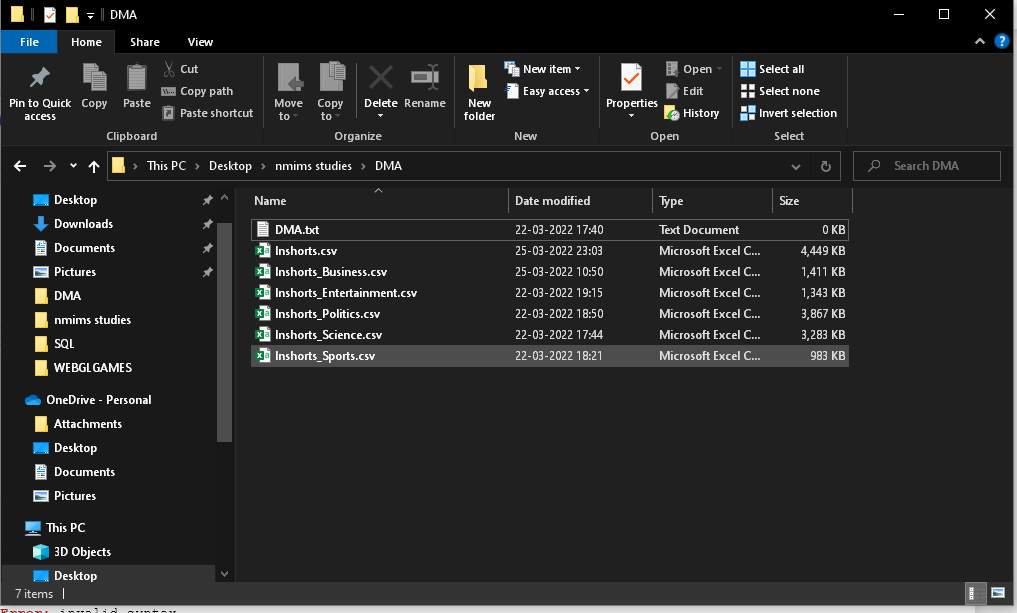

In [7]:
dfBusiness

NameError: name 'dfBusiness' is not defined

In [8]:
dfBusiness.to_csv('C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Business.csv')

NameError: name 'dfBusiness' is not defined

In [10]:
df = df.append({'Title' : 'title', 'Content' : newsObject:'content'] , 'Category' : 'science' }, 
                ignore_index = True)

SyntaxError: invalid syntax (<ipython-input-10-5fc101662c06>, line 1)

Title  \
0   \nSuzuki to invest ₹10,440 cr to make electric...   
1   \n₹224 cr undisclosed income found during raid...   
2   \nReliance Retail acquires 89% stake in women'...   
3   \nRussia's richest man's property worth $116 m...   
4   \nApple ex-employee charged with defrauding co...   
..                                                ...   
22  \nIndia's wholesale inflation rises to 13.11% ...   
23  \nLIC reports ₹235 crore net profit in Q3 ahea...   
24  \nLIC IPO likely to be launched in mid-May: Re...   
25  \nCooperative sector to contribute hugely in $...   
26  \nI-T dept conducts searches at real estate gr...   

                                              Content  Category  
0   Japan's Suzuki Motor Corporation has announced...  business  
1   The Income Tax department found an undisclosed...  business  
2   Reliance Retail Ventures Limited (RRVL) has ac...  business  
3   Italian authorities have seized a building com...  business  
4   Dhirendra Prasad, a former Apple employee, has...  business  
..                                                ...       ...  
22  Wholesale inflation in India rose 828 basis po...  business  
23  IPO-bound LIC's net profit rose from ₹94 lakh ...  business  
24  LIC's IPO may be postponed to mid-May amid ris...  business  
25  Cooperation Minister Amit Shah on Sunday said ...  business  
26  The Income Tax Department on Monday conducted ...  business  

[162 rows x 3 columns]

In [12]:
df1.reset_index(inplace = True)

In [13]:
df1=df1.drop(['index'], axis=1)

In [14]:
dfEntertainment.to_csv('C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Entertainment.csv')

NameError: name 'dfEntertainment' is not defined

In [15]:
df2

NameError: name 'df2' is not defined

In [16]:
df2=df1

In [17]:
df1=df2


In [18]:
dfPolitics=df1

In [19]:
dfPolitics

Title  \
0    \nSuzuki to invest ₹10,440 cr to make electric...   
1    \n₹224 cr undisclosed income found during raid...   
2    \nReliance Retail acquires 89% stake in women'...   
3    \nRussia's richest man's property worth $116 m...   
4    \nApple ex-employee charged with defrauding co...   
..                                                 ...   
157  \nIndia's wholesale inflation rises to 13.11% ...   
158  \nLIC reports ₹235 crore net profit in Q3 ahea...   
159  \nLIC IPO likely to be launched in mid-May: Re...   
160  \nCooperative sector to contribute hugely in $...   
161  \nI-T dept conducts searches at real estate gr...   

                                               Content  Category  
0    Japan's Suzuki Motor Corporation has announced...  business  
1    The Income Tax department found an undisclosed...  business  
2    Reliance Retail Ventures Limited (RRVL) has ac...  business  
3    Italian authorities have seized a building com...  business  
4    Dhirendra Prasad, a former Apple employee, has...  business  
..                                                 ...       ...  
157  Wholesale inflation in India rose 828 basis po...  business  
158  IPO-bound LIC's net profit rose from ₹94 lakh ...  business  
159  LIC's IPO may be postponed to mid-May amid ris...  business  
160  Cooperation Minister Amit Shah on Sunday said ...  business  
161  The Income Tax Department on Monday conducted ...  business  

[162 rows x 3 columns]

In [20]:
dfSports=df1

In [43]:
dfSports

Title  \
0     \nSouth Africa once needed 22 off 13 balls, ra...   
1     \nDavid Beckham hands Instagram account to Ukr...   
2     \nPakistan win a Women's World Cup game for th...   
3     \nWho holds the record for playing the most de...   
4     \nVirat Kohli joins RCB bio-bubble ahead of IP...   
...                                                 ...   
2258  \nDismissing Rohit, Rahul and Kohli would be m...   
2259  \nPlaying against Yuvraj Singh was always an i...   
2260  \nChahal will be under pressure to take wicket...   
2261  \nProud of the performance: Rijiju on India's ...   
2262  \nT20Is shouldn't be played on it: Inzamam cri...   

                                                Content Category  
0     South Africa needed 22 runs off 13 balls to wi...   sports  
1     David Beckham has handed control of his Instag...   sports  
2     Pakistan defeated West Indies today to win a m...   sports  
3     Late England batter Walter Reginald Hammond ho...   sports  
4     Former RCB captain Virat Kohli joined the team...   sports  
...                                                 ...      ...  
2258  Terming the dismissals of Rohit Sharma, KL Rah...   sports  
2259  Sharing his experience while playing against Y...   sports  
2260  Talking about India's ODI and T20I series agai...   sports  
2261  Union Law Minister Kiren Rijiju took to Twitte...   sports  
2262  Criticising the pitch at National Stadium in K...   sports  

[2263 rows x 3 columns]

In [23]:
dfEntertainment

Title  \
0    \nSuzuki to invest ₹10,440 cr to make electric...   
1    \n₹224 cr undisclosed income found during raid...   
2    \nReliance Retail acquires 89% stake in women'...   
3    \nRussia's richest man's property worth $116 m...   
4    \nApple ex-employee charged with defrauding co...   
..                                                 ...   
157  \nIndia's wholesale inflation rises to 13.11% ...   
158  \nLIC reports ₹235 crore net profit in Q3 ahea...   
159  \nLIC IPO likely to be launched in mid-May: Re...   
160  \nCooperative sector to contribute hugely in $...   
161  \nI-T dept conducts searches at real estate gr...   

                                               Content  Category  
0    Japan's Suzuki Motor Corporation has announced...  business  
1    The Income Tax department found an undisclosed...  business  
2    Reliance Retail Ventures Limited (RRVL) has ac...  business  
3    Italian authorities have seized a building com...  business  
4    Dhirendra Prasad, a former Apple employee, has...  business  
..                                                 ...       ...  
157  Wholesale inflation in India rose 828 basis po...  business  
158  IPO-bound LIC's net profit rose from ₹94 lakh ...  business  
159  LIC's IPO may be postponed to mid-May amid ris...  business  
160  Cooperation Minister Amit Shah on Sunday said ...  business  
161  The Income Tax Department on Monday conducted ...  business  

[162 rows x 3 columns]

In [24]:
df1[:5]

Title  \
0  \nSuzuki to invest ₹10,440 cr to make electric...   
1  \n₹224 cr undisclosed income found during raid...   
2  \nReliance Retail acquires 89% stake in women'...   
3  \nRussia's richest man's property worth $116 m...   
4  \nApple ex-employee charged with defrauding co...   

                                             Content  Category  
0  Japan's Suzuki Motor Corporation has announced...  business  
1  The Income Tax department found an undisclosed...  business  
2  Reliance Retail Ventures Limited (RRVL) has ac...  business  
3  Italian authorities have seized a building com...  business  
4  Dhirendra Prasad, a former Apple employee, has...  business

In [44]:
dfEntertainment

Title  \
0     \nRaj's Kota imposes Sec 144 till April 21 in ...   
1     \nRapper MC Tod Fod, who featured in 'Gully Bo...   
2     \nSushmita Sen, ex-boyfriend Rohman seen toget...   
3     \nSiddhant Chaturvedi mourns 24-year-old rappe...   
4     \nI've been out of work for 3yrs, people lost ...   
...                                                 ...   
3037  \nWas in excruciating mental, physical pain ov...   
3038  \nA dream come true: Ahan on Salman kissing 'T...   
3039  \nForever cowboy: Zoya wishes father Javed Akh...   
3040  \nMy upcoming projects have truly pushed me as...   
3041  \nI don’t want to be typecast as an action her...   

                                                Content       Category  
0     Section 144 of CrPC has been imposed in Rajast...  entertainment  
1     Rapper Dharmesh Parmar aka MC Tod Fod, who fea...  entertainment  
2     Actress Sushmita Sen and her ex-boyfriend Rohm...  entertainment  
3     Actor Siddhant Chaturvedi took to Instagram St...  entertainment  
4     Actor Bobby Deol has stated that he has seen h...  entertainment  
...                                                 ...            ...  
3037  Responding to a query about her mental health,...  entertainment  
3038  Ahan Shetty opened up about Salman Khan's gest...  entertainment  
3039  Taking to Instagram, filmmaker Zoya Akhtar wis...  entertainment  
3040  Talking about his upcoming projects, actor Vij...  entertainment  
3041  Actor Ahan Shetty has said that he does not wa...  entertainment  

[3042 rows x 3 columns]

In [8]:
dfScience=pd.read_csv("C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Science.csv")
dfScience=dfScience.drop(["index"],axis=1)

In [11]:
dfScience=dfScience.drop(["Unnamed: 0"],axis=1)

In [12]:
dfScience

Title  \
0     \nPics show 214-million-year-old geological st...   
1     \nNASA shares pic of infant star's energetic o...   
2     \nWorld's biggest telescope captures star with...   
3     \nCaribbean coral reefs have been warming for ...   
4     \nPet hamsters can trasmit COVID-19 to humans:...   
...                                                 ...   
7316  \n100% clean energy possible in 139 countries ...   
7317  \nNASA unveils image of snow-covered dunes on ...   
7318  \nEarth's hot interior made graveyard of tecto...   
7319  \nFirst scientist to measure West Antarctic Ic...   
7320  \nAstronomers make 'best ever' images of a sta...   

                                                Content Category  
0     Astronaut Kayla Barron, who's currently aboard...  science  
1     NASA has shared the picture of an energetic ou...  science  
2     James Webb Space Telescope, the world's bigges...  science  
3     US researchers stated Caribbean coral reefs ha...  science  
4     Hong Kong researchers said pet hamsters can pa...  science  
...                                                 ...      ...  
7316  A study analysing possibilities of complete re...  science  
7317  NASA's Mars Reconnaissance Orbiter has beamed ...  science  
7318  An MIT study has found Earth harboured a mantl...  science  
7319  Charles Bentley, who in the 1950s led an exped...  science  
7320  Astronomers using the Chile-based Very Large T...  science  

[7321 rows x 3 columns]

In [13]:
dfEntertainment=pd.read_csv("C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Entertainment.csv")
dfEntertainment=dfEntertainment.drop(["Unnamed: 0"],axis=1)

In [14]:
dfEntertainment=dfEntertainment.drop(["Unnamed: 0"],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
dfEntertainment

Title  \
0     \nRaj's Kota imposes Sec 144 till April 21 in ...   
1     \nRapper MC Tod Fod, who featured in 'Gully Bo...   
2     \nSushmita Sen, ex-boyfriend Rohman seen toget...   
3     \nSiddhant Chaturvedi mourns 24-year-old rappe...   
4     \nI've been out of work for 3yrs, people lost ...   
...                                                 ...   
3037  \nWas in excruciating mental, physical pain ov...   
3038  \nA dream come true: Ahan on Salman kissing 'T...   
3039  \nForever cowboy: Zoya wishes father Javed Akh...   
3040  \nMy upcoming projects have truly pushed me as...   
3041  \nI don’t want to be typecast as an action her...   

                                                Content       Category  
0     Section 144 of CrPC has been imposed in Rajast...  entertainment  
1     Rapper Dharmesh Parmar aka MC Tod Fod, who fea...  entertainment  
2     Actress Sushmita Sen and her ex-boyfriend Rohm...  entertainment  
3     Actor Siddhant Chaturvedi took to Instagram St...  entertainment  
4     Actor Bobby Deol has stated that he has seen h...  entertainment  
...                                                 ...            ...  
3037  Responding to a query about her mental health,...  entertainment  
3038  Ahan Shetty opened up about Salman Khan's gest...  entertainment  
3039  Taking to Instagram, filmmaker Zoya Akhtar wis...  entertainment  
3040  Talking about his upcoming projects, actor Vij...  entertainment  
3041  Actor Ahan Shetty has said that he does not wa...  entertainment  

[3042 rows x 3 columns]

In [16]:
dfPolitics=pd.read_csv("C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Politics.csv")
dfPolitics=dfPolitics.drop(["Unnamed: 0"],axis=1)

In [17]:
dfPolitics

Title  \
0       \nPushkar Singh Dhami named as Uttarakhand CM\n   
1     \nPramod Sawant to continue as Goa Chief Minis...   
2     \nI will only help those who voted for me: UP ...   
3     \nN Biren Singh takes oath as Manipur CM; 5 ML...   
4     \nHope wisdom prevails in future: Tharoor as S...   
...                                                 ...   
8722  \nHow can he do low-level politics?: Delhi CM ...   
8723  \nDo elderly women in farmer protests look lik...   
8724  \nSanjay Raut admitted to Lilavati Hospital, t...   
8725  \nBJP forms 117-member election management tea...   
8726  \nTRS brought down voter turnout at GHMC polls...   

                                                Content  Category  
0     Uttarakhand's caretaker CM Pushkar Singh Dhami...  politics  
1     Goa's caretaker CM Pramod Sawant has been chos...  politics  
2     BJP MLA Dinesh Rawat, who won from Uttar Prade...  politics  
3     N Biren Singh on Monday took oath as the Chief...  politics  
4     Congress MP Shashi Tharoor said he pulled out ...  politics  
...                                                 ...       ...  
8722  After Punjab CM Captain Amarinder Singh accuse...  politics  
8723  Shiromani Akali Dal (SAD) President Sukhbir Si...  politics  
8724  Shiv Sena MP Sanjay Raut was admitted to the L...  politics  
8725  For the 2021 West Bengal Assembly polls, BJP h...  politics  
8726  Union Minister of State, G Kishan Reddy, alleg...  politics  

[8727 rows x 3 columns]

In [18]:
dfSports=pd.read_csv("C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Sports.csv")
dfSports=dfSports.drop(["Unnamed: 0"],axis=1)

In [19]:
dfSports

Title  \
0     \nSouth Africa once needed 22 off 13 balls, ra...   
1     \nDavid Beckham hands Instagram account to Ukr...   
2     \nPakistan win a Women's World Cup game for th...   
3     \nWho holds the record for playing the most de...   
4     \nVirat Kohli joins RCB bio-bubble ahead of IP...   
...                                                 ...   
2258  \nDismissing Rohit, Rahul and Kohli would be m...   
2259  \nPlaying against Yuvraj Singh was always an i...   
2260  \nChahal will be under pressure to take wicket...   
2261  \nProud of the performance: Rijiju on India's ...   
2262  \nT20Is shouldn't be played on it: Inzamam cri...   

                                                Content Category  
0     South Africa needed 22 runs off 13 balls to wi...   sports  
1     David Beckham has handed control of his Instag...   sports  
2     Pakistan defeated West Indies today to win a m...   sports  
3     Late England batter Walter Reginald Hammond ho...   sports  
4     Former RCB captain Virat Kohli joined the team...   sports  
...                                                 ...      ...  
2258  Terming the dismissals of Rohit Sharma, KL Rah...   sports  
2259  Sharing his experience while playing against Y...   sports  
2260  Talking about India's ODI and T20I series agai...   sports  
2261  Union Law Minister Kiren Rijiju took to Twitte...   sports  
2262  Criticising the pitch at National Stadium in K...   sports  

[2263 rows x 3 columns]

In [20]:
dfBusiness=pd.read_csv("C:\\Users\\likhi\\OneDrive\\Desktop\\nmims studies\\DMA\\Inshorts_Business.csv")
dfBusiness=dfBusiness.drop(["Unnamed: 0"],axis=1)

In [37]:
dfBusiness.head(20)

Title  \
0   \nSuzuki to invest ₹10,440 cr to make electric...   
1   \n₹224 cr undisclosed income found during raid...   
2   \nReliance Retail acquires 89% stake in women'...   
3   \nRussia's richest man's property worth $116 m...   
4   \nGovt working on classification of cryptos un...   
5   \nBezos' ex-wife MacKenzie donates $281 mn to ...   
6   \nBrazil bans Telegram, CEO says 'company was ...   
7   \nApple ex-employee charged with defrauding co...   
8   \nCooperating with authorities: Infra.Market a...   
9   \nHe is Aatmanirbhar: Anand Mahindra on 19-yea...   
10  \nUS toy company raises money for Ukraine with...   
11  \nUK's luxury department store Harrods admits ...   
12  \nUS is offering rewards of up to $5 million f...   
13  \nCondom sales surge in Russia amid Western sa...   
14  \nJhunjhunwala purchased 12 apartments for ₹37...   
15  \nJhunjhunwala's multi-storey mansion to have ...   
16  \nIndia's forex reserves decline by $9.6 bn in...   
17  \nFuture Retail to hold shareholder meeting to...   
18  \nElon Musk among witnesses in Johnny Depp & A...   
19  \nPayPal expands services for Ukrainian users,...   

                                              Content  Category  
0   Japan's Suzuki Motor Corporation has announced...  business  
1   The Income Tax department found an undisclosed...  business  
2   Reliance Retail Ventures Limited (RRVL) has ac...  business  
3   Italian authorities have seized a building com...  business  
4   The government is reportedly working on the cl...  business  
5   Philanthropist MacKenzie Scott has donated $28...  business  
6   After Brazil’s Supreme Court banned Telegram f...  business  
7   Dhirendra Prasad, a former Apple employee, has...  business  
8   Infra.Market Founder Souvik Sengupta on Sunday...  business  
9   Sharing the viral video of a 19-year-old man r...  business  
10  A Chicago artist has designed a Lego-style fig...  business  
11  Luxury British department store Harrods admitt...  business  
12  The US government is offering rewards of up to...  business  
13  Amid Western sanctions and fear of shortage, s...  business  
14  Billionaire Rakesh Jhunjhunwala bought 12 apar...  business  
15  Billionaire Rakesh Jhunjhunwala's 70,000 sq ft...  business  
16  India's foreign exchange reserves declined by ...  business  
17  Future Group companies, including Future Retai...  business  
18  World's richest person Elon Musk has been incl...  business  
19  PayPal said it is expanding services in Ukrain...  business

In [137]:
#Combining all the dataframes in one dataframe with equal proportion


dfInshorts = pd.concat([dfScience.head(2000), dfSports.head(2000), dfPolitics.head(2000), dfEntertainment.head(2000), dfBusiness.head(2000)], axis=0,ignore_index=True)


In [138]:
dfInshorts

Title  \
0     \nPics show 214-million-year-old geological st...   
1     \nNASA shares pic of infant star's energetic o...   
2     \nWorld's biggest telescope captures star with...   
3     \nCaribbean coral reefs have been warming for ...   
4     \nPet hamsters can trasmit COVID-19 to humans:...   
...                                                 ...   
9995  \nSensex jumps 900 points after crashing 1,100...   
9996  \nWalmart sued for illegally dumping over a mi...   
9997  \nWipro to acquire US-based cybersecurity firm...   
9998  \nOracle to buy Cerner for $28 billion in its ...   
9999  \niPhone maker Foxconn to shut TN plant for 5 ...   

                                                Content  Category  
0     Astronaut Kayla Barron, who's currently aboard...   science  
1     NASA has shared the picture of an energetic ou...   science  
2     James Webb Space Telescope, the world's bigges...   science  
3     US researchers stated Caribbean coral reefs ha...   science  
4     Hong Kong researchers said pet hamsters can pa...   science  
...                                                 ...       ...  
9995  The Sensex jumped more than 900 points on Tues...  business  
9996  California officials have sued Walmart, accusi...  business  
9997  Wipro on Monday announced it has signed an agr...  business  
9998  Oracle on Monday announced that it will buy el...  business  
9999  Foxconn, which makes Apple's iPhones, will shu...  business  

[10000 rows x 3 columns]

## Visualizing the data


### We want to check the frequency of words and the type oof words in each category. We do this using word cloud 

business related words:


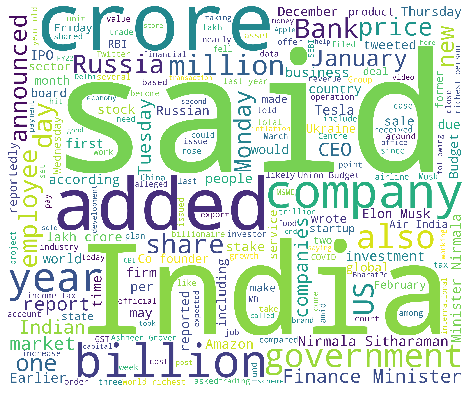

science related words:


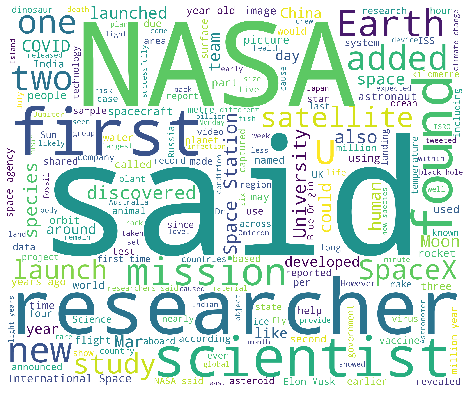

politics related words:


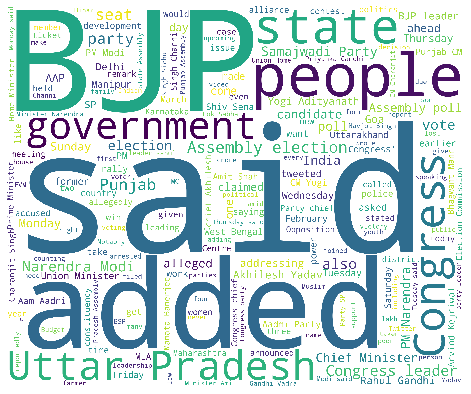

sports related words:


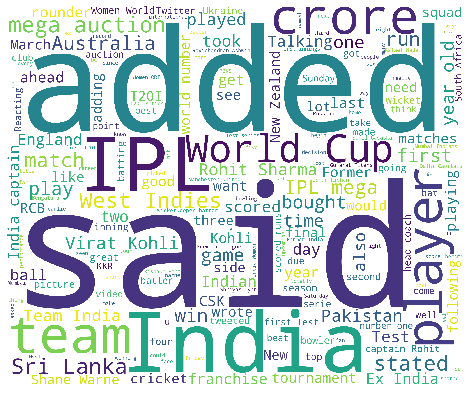

entertainment related words:


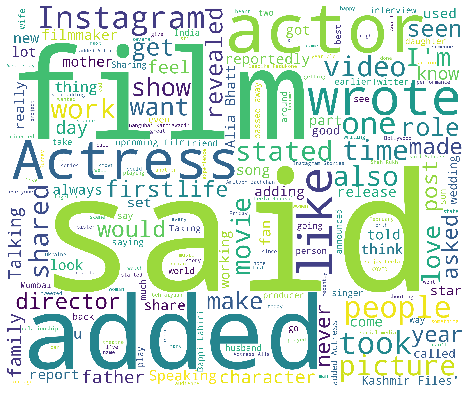

In [24]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

science = dfInshorts[dfInshorts['Category'] == 'science']
science = science['Content']

sports = dfInshorts[dfInshorts['Category'] == 'sports']
sports = sports['Content']

politics = dfInshorts[dfInshorts['Category'] == 'politics']
politics = politics['Content']

business = dfInshorts[dfInshorts['Category'] == 'business']
business = business['Content']

entertainment = dfInshorts[dfInshorts['Category'] == 'entertainment']
entertainment = entertainment['Content']

def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 3000, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business words:")
wordcloud_draw(business, 'white')

print("science words:")
wordcloud_draw(science, 'white')

print("politics words:")
wordcloud_draw(politics, 'white')

print("sports words:")
wordcloud_draw(sports, 'white')

print("entertainment words:")
wordcloud_draw(entertainment, 'white')

## Cleaning and preparing the dataset for classification 

In [140]:
#used regex

def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
dfInshorts['Content'] = dfInshorts['Content'].apply(remove_tags)


In [141]:
dfInshorts['Content'].head(10)

0    Astronaut Kayla Barron, who's currently aboard...
1    NASA has shared the picture of an energetic ou...
2    James Webb Space Telescope, the world's bigges...
3    US researchers stated Caribbean coral reefs ha...
4    Hong Kong researchers said pet hamsters can pa...
5    Scientists have created an algorithm using 700...
6    An industrial team led by UK-based Thales Alen...
7    A team of Indian solar physicists has develope...
8    Ministry of Earth Sciences Secretary M Ravicha...
9    UK-based startup Space Forge and Richard Brans...
Name: Content, dtype: object

In [143]:
dfInshorts['Content'].head(10)

0    Astronaut Kayla Barron  who s currently aboard...
1    NASA has shared the picture of an energetic ou...
2    James Webb Space Telescope  the world s bigges...
3    US researchers stated Caribbean coral reefs ha...
4    Hong Kong researchers said pet hamsters can pa...
5    Scientists have created an algorithm using 700...
6    An industrial team led by UK based Thales Alen...
7    A team of Indian solar physicists has develope...
8    Ministry of Earth Sciences Secretary M Ravicha...
9    UK based startup Space Forge and Richard Brans...
Name: Content, dtype: object

In [144]:
def convert_lower_remove_special_char(text):
    reviews = ''
    if type(text) is not int:
        for x in text:
            if x.isalnum():
                
                  reviews = reviews + x
            else:
                  reviews = reviews + ' '
                    
        reviews=reviews.lower()
        
                    
    return reviews
dfInshorts['Content'] = dfInshorts['Content'].apply(convert_lower_remove_special_char)

In [145]:


for i in range(0,len(dfInshorts['Content'])):
    dfInshorts['Content'][i]=" ".join(dfInshorts['Content'][i].split())


In [146]:
dfInshorts['Content'].head(20)

0     astronaut kayla barron who s currently aboard ...
1     nasa has shared the picture of an energetic ou...
2     james webb space telescope the world s biggest...
3     us researchers stated caribbean coral reefs ha...
4     hong kong researchers said pet hamsters can pa...
5     scientists have created an algorithm using 700...
6     an industrial team led by uk based thales alen...
7     a team of indian solar physicists has develope...
8     ministry of earth sciences secretary m ravicha...
9     uk based startup space forge and richard brans...
10    researchers at the indian institute of science...
11    un on monday launched its final talks to strik...
12    scientists from new zealand japan said unusual...
13    a study that examined 213 adolescent participa...
14    researchers in brazil have compiled 261 photos...
15    eu chief advisor nathan fabian on tuesday said...
16    as per the national oceanic and atmospheric ad...
17    us scientists have created a new lightweig

In [147]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
dfInshorts['Content'] = dfInshorts['Content'].apply(remove_stopwords)
dfInshorts['Content'][1]

['nasa',
 'shared',
 'picture',
 'energetic',
 'outburst',
 'infant',
 'star',
 'captured',
 'hubble',
 'space',
 'telescope',
 'sharing',
 'picture',
 'twitter',
 'nasa',
 'tweeted',
 'star',
 'born',
 'nasa',
 'explained',
 'stellar',
 'tantrum',
 'produced',
 'extremely',
 'young',
 'star',
 'earliest',
 'phase',
 'formation',
 'consists',
 'incandescent',
 'jet',
 'gas',
 'travelling',
 'supersonic',
 'speeds']

In [148]:
dfInshorts['Content']

0       [astronaut, kayla, barron, currently, aboard, ...
1       [nasa, shared, picture, energetic, outburst, i...
2       [james, webb, space, telescope, world, biggest...
3       [us, researchers, stated, caribbean, coral, re...
4       [hong, kong, researchers, said, pet, hamsters,...
                              ...                        
9995    [sensex, jumped, 900, points, tuesday, trade, ...
9996    [california, officials, sued, walmart, accusin...
9997    [wipro, monday, announced, signed, agreement, ...
9998    [oracle, monday, announced, buy, electronic, m...
9999    [foxconn, makes, apple, iphones, shut, plant, ...
Name: Content, Length: 10000, dtype: object

In [149]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
dfInshorts['Content'] = dfInshorts['Content'].apply(lemmatize_word)
dfInshorts['Content'][1]

'nasa shared picture energetic outburst infant star captured hubble space telescope sharing picture twitter nasa tweeted star born nasa explained stellar tantrum produced extremely young star earliest phase formation consists incandescent jet gas travelling supersonic speed'

In [150]:
dfInshorts['Content']

0       astronaut kayla barron currently aboard i shar...
1       nasa shared picture energetic outburst infant ...
2       james webb space telescope world biggest power...
3       u researcher stated caribbean coral reef warmi...
4       hong kong researcher said pet hamster pas covi...
                              ...                        
9995    sensex jumped 900 point tuesday trade 56 700 l...
9996    california official sued walmart accusing worl...
9997    wipro monday announced signed agreement acquir...
9998    oracle monday announced buy electronic medical...
9999    foxconn make apple iphones shut plant tamil na...
Name: Content, Length: 10000, dtype: object

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dfInshorts.Content.values)
y = np.array(dfInshorts.Category.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dfInshorts.Content).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (10000, 5000)
y.shape =  (10000,)


In [80]:
text=dfInshorts['Content']
for word in text:
    print(word)
    print('/')

Astronaut Kayla Barron  who s currently aboard ISS  shared photos of a 214 million year old geological structure on Earth   The Manicouagan Reservoir and René Levasseur Island always catch my eye during passes over Quebec   she wrote   This   geological structure was formed   by a meteorite that scientists estimate was about 5 km in diameter and struck the earth at   17 km s   Barron added  
/
NASA has shared the picture of an energetic outburst from an infant star captured by the Hubble Space Telescope  Sharing the picture on Twitter  NASA tweeted   A star is born   NASA explained   This stellar tantrum  produced by an extremely young star in the earliest phase of formation  consists of an incandescent jet of gas travelling at supersonic speeds  
/
James Webb Space Telescope  the world s biggest and most powerful space telescope  completed its final round of fine phasing to correct its alignment errors  During the process  the telescope focussed on a single star  however  several anci

/
World s richest man Jeff Bezos may not be considered an astronaut based on the new rules issued by US  Federal Aviation Administration on July 20  the same day of his space flight  One of the requirements states that astronaut hopefuls must also demonstrate  activities during flight that were essential to public safety  or contributed to human space flight safety  
/
America s 82 year old Wally Funk  who flew to space with the world s richest person Jeff Bezos on Blue Origin s first human flight on Tuesday  has become the oldest person to travel to space  She took a postcard bearing her picture to space  Before her space flight today  America s John Glenn was the oldest to fly to space at 77 
/
Amazon Founder and world s richest person Jeff Bezos has landed after having travelled successfully to space in Blue Origin s first human flight  Bezos voyage to space lasted about 10 minutes and 20 seconds  The flight coincides with the anniversary of Astronauts Neil Armstrong and Edwin Aldri

Yin Weidong  the CEO of China s Sinovac Biotech Ltd has said that about 90  of the firm s employees and their families have taken an experimental coronavirus vaccine developed by the firm on a voluntary basis  The vaccine has been developed under the country s emergency use program  Sinovac s CoronaVac is in Phase 3 clinical trials 
/
Johnson   Johnson on Thursday said its experimental coronavirus vaccine prevented hamsters from getting severely ill  In pre clinical study  vaccinated animals lost less weight and had less virus in their lungs and other organs as compared to unvaccinated animals  Syrian golden hamsters were first vaccinated and then exposed to coronavirus after four weeks 
/
Russia s  Sputnik V  COVID 19 vaccine produced an antibody response in all participants  according to results from phase 1 and 2 that were published in The Lancet medical journal   Large  long term trials including a placebo comparison  and further monitoring are needed to establish the long term saf

/
Ahead of IPL 2022  former RCB captain Daniel Vettori said   I don t think Virat Kohli will captain RCB again   He added that Faf du Plessis  Dinesh Karthik  Glenn Maxwell and Kohli could form RCB s leadership group   I don t think  becoming captain again after giving up captaincy  ever works  Once   captain has moved on   the right thing is for him to move on  
/
Fashion designer Masaba Gupta wished her father  former West Indies cricketer Vivian Richards on his 70th birthday and shared a throwback picture with him  Taking to Instagram  Masaba wrote   My father is unrelenting  and  focussed    He  has lived his life in the pursuit of greatness   I set out in my pursuit to be even half as great as you   Happy 70th birthday papa  
/
Actress Anushka Sharma took to Instagram Stories and congratulated Team India for securing a 107 run win over Pakistan in the ongoing Women s ODI World Cup   What a flawless performance by our women in blue on securing their first win at the tournament  Goo

/
Reflecting on Delhi Capitals  buys in IPL 2022 mega auction  assistant coach Pravin Amre said team s strategy is to back Indian bowlers in IPL 2022 as with South Africa pacer Anrich Nortje in the squad they can use several other combinations   We will get these options of combinations with a left arm seamer like Chetan Sakariya and Khaleel Ahmed   he added 
/
Explaining the reason why Mumbai Indians bought Jofra Archer in IPL mega auction 2022 despite his possible non availability in IPL 2022  owner Akash Ambani said when England pacer is fit and available  he ll make a formidable partnership with Jasprit Bumrah  Archer is currently recovering from an elbow injury  The 26 year old was bought by MI for  8 crore 
/
After being bought by Punjab Kings in IPL mega auction 2022 for  2 crore  India Under 19 all rounder Raj Bawa said he s excited to be given a chance in the franchise   It s been my favourite team for a long time  I remember going to see their games right after practice in   

Bahujan Samaj Party president Mayawati said that her party will form the government in Uttar Pradesh and will send Yogi Adityanath  back to his mutt    Seeing this turnout and its enthusiasm  I can say that you are set to bring the BSP back to power and make your  behenji  the Chief Minister for the fifth time   Mayawati added  
/
As polling for the sixth phase of UP Assembly polls began on Thursday  BJP MP from Gorakhpur  Ravi Kishan  said that the voter turnout will be historic in the Purvanchal region   We will win all nine seats in Gorakhpur mandal BJP will get over 300 seats   Kishan added   The people of UP have decided to establish Ram Rajya here   Kishan stated 
/
Suheldev Bhartiya Samaj Party  SBSP  chief OP Rajbhar on Thursday said   The BJP is fighting for its existence in this election   He also said that BJP won t be able to even cross the double figure in eastern Uttar Pradesh   In the assembly constituencies of Ballia  Mau  Azamgarh  Ambedkar Nagar and Ghazipur  BJP won 

/
BJP on Tuesday announced the names of 17 more candidates for the UP Assembly elections  It has fielded former Enforcement Directorate  ED  joint director Rajeshwar Singh from Lucknow s Sarojini Nagar seat  This comes a day after Singh s application for voluntary retirement scheme  VRS  was accepted  BJP has denied a ticket to the outgoing Legislative Assembly Speaker Hriday Narayan Dixit 
/
PM Narendra Modi s lookalike Abhinandan Pathak has announced that he s contesting Uttar Pradesh Assembly elections as an independent candidate  Pathak  who sells cucumbers on trains for a living  said   I m a  Modi Bhakt    I ll contest and win the election to help Yogi Adityanath become CM   He further said he applied for a poll ticket from BJP but failed to get one 
/
SAD leader Bikram Singh Majithia will contest only from Amritsar East in the Punjab Assembly elections while his wife Ganieve Kaur will contest from his turf Majitha  Earlier  Punjab Congress chief and Congress candidate from Amrit

Canadian filmmaker Shawn Levy has been roped in to direct Ryan Reynolds  third  Deadpool  movie  Rhett Reese and Paul Wernick  who penned the screenplays for the first two movies  are also returning for the third instalment  Shawn and Ryan worked together in  Free Guy  and the recently released action adventure movie  The Adam Project    
/
Actor Sanjay Kapoor while talking about the casting process said   It has got nothing to do with star power  but whether you are capable of delivering good    It feels   good when you sign something on OTT  You know you are not being cast because of a certain value   your talent is enough   the actor added 
/
 The Kashmir Files  team  including director Vivek Ranjan Agnihotri  actress Pallavi Joshi and producer Abhishek Agarwal  met PM Narendra Modi on Saturday  Abhishek took to Twitter to share some pictures from the meeting and wrote   It was a pleasure to meet our Hon ble PM Shri Narendra Modi  What makes it more special is his   noble words abou

/
Producer Boney Kapoor s daughter Khushi Kapoor is all set to make her Bollywood debut soon  Confirming the development  Boney said in an interview that his daughter will start shooting for the project in April  It was earlier reported that Khushi will make her debut alongside Shah Rukh Khan s daughter Suhana in Zoya Akhtar s live action musical film based on Archie Comics  
/
The makers of  Afwaah  have reportedly roped in Taapsee Pannu for the upcoming film  which also stars Nawazuddin Siddiqui and Bhumi Pednekar  The quirky thriller will be directed by Sudhir Mishra and produced by Anubhav Sinha and Bhushan Kumar   Afwaah  is said to take on the subject of rumour mongering and misinformation  
/
Actor Mark Wahlberg said that he had met screenwriter William Monahan at Warner Bros to discuss the idea of a sequel to the 2006 film  The Departed    Let s just say the pitch didn t go very well   Wahlberg stated  He added that Monahan was interested in casting actors like Brad Pitt and Ro

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Splitting data, Train and Test

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

7000
3000


## Now we are ready to train the model 

Used a one vs all approach for all the models, as the computation time and the complexity is quiet lower compared to one vs one.

Random Forest,
Multinomial Naive Bayes,
Support Vector Classifer,
Decision Tree Classifier,
K Nearest Neighbour,
Gaussian Naive Bayes

In [168]:
perform_list = [ ]


def model(MdName):
    model=''
    if MdName == 'Logistic Regression':
        model = LogisticRegression()
    elif MdName == 'Support Vector Classifer':
        model = SVC()
    elif MdName == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif MdName == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif MdName == 'Multinomial Naive Bayes':
        model = MultinomialNB(alpha=1.0,fit_prior=True)
    elif MdName == 'K Nearest Neighbour':
        model = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif MdName == 'Gaussian Naive Bayes':
        model = GaussianNB()
        
    oneVsRest = OneVsRestClassifier(model)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)

    prec, reca, f1, supp = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {acc}')

    print(f'Precision : {prec}')

    print(f'Recall : {reca}')

    print(f'F1-score : {f1}')


    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(acc, 2)),

    ('Precision', round(prec, 2)),

    ('Recall', round(reca, 2)),

    ('F1', round(f1, 2))

    ]))

In [169]:
model('Logistic Regression')

Test Accuracy Score of Basic Logistic Regression: % 95.3
Precision : 0.953
Recall : 0.953
F1-score : 0.953


In [170]:
model('Random Forest')

Test Accuracy Score of Basic Random Forest: % 95.33
Precision : 0.9533333333333334
Recall : 0.9533333333333334
F1-score : 0.9533333333333334


In [171]:
model('Multinomial Naive Bayes')


Test Accuracy Score of Basic Multinomial Naive Bayes: % 95.7
Precision : 0.957
Recall : 0.957
F1-score : 0.957


In [172]:
model('Support Vector Classifer')


Test Accuracy Score of Basic Support Vector Classifer: % 95.57
Precision : 0.9556666666666667
Recall : 0.9556666666666667
F1-score : 0.9556666666666667


In [173]:
model('Decision Tree Classifier')


Test Accuracy Score of Basic Decision Tree Classifier: % 87.03
Precision : 0.8703333333333333
Recall : 0.8703333333333333
F1-score : 0.8703333333333333


In [174]:
model('K Nearest Neighbour')


Test Accuracy Score of Basic K Nearest Neighbour: % 84.47
Precision : 0.8446666666666667
Recall : 0.8446666666666667
F1-score : 0.8446666666666667


In [175]:
model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Gaussian Naive Bayes: % 82.13
Precision : 0.8213333333333334
Recall : 0.8213333333333334
F1-score : 0.8213333333333332


In [176]:
mdl=LogisticRegression()


In [178]:
z=mdl.fit(x_train,y_train)

In [195]:
ar=np.array(['Little john'])
ar.reshape(2, 2)
y_pred = z.predict(ar)

ValueError: cannot reshape array of size 1 into shape (2,2)

In [187]:
y_pred[1:100]

array(['science', 'sports', 'politics', 'sports', 'business', 'politics',
       'entertainment', 'sports', 'sports', 'science', 'science',
       'sports', 'entertainment', 'sports', 'sports', 'entertainment',
       'sports', 'entertainment', 'entertainment', 'sports', 'politics',
       'politics', 'entertainment', 'politics', 'sports', 'sports',
       'science', 'politics', 'politics', 'business', 'business',
       'politics', 'politics', 'business', 'politics', 'entertainment',
       'business', 'science', 'business', 'entertainment', 'politics',
       'politics', 'entertainment', 'politics', 'science',
       'entertainment', 'politics', 'politics', 'politics',
       'entertainment', 'business', 'entertainment', 'entertainment',
       'politics', 'sports', 'business', 'sports', 'science', 'politics',
       'science', 'business', 'sports', 'politics', 'sports', 'sports',
       'entertainment', 'science', 'business', 'entertainment',
       'business', 'politics', 'politics

In [197]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [198]:
arr=[[1,2],[1,3]]

In [200]:
cv = CountVectorizer(max_features = 5000)
xt1 = cv.fit_transform(dfInshorts['Content'][0]).toarray()

ValueError: Iterable over raw text documents expected, string object received.

In [209]:

df = pd.DataFrame(data=x_train,columns = cv.get_feature_names())


In [205]:
x_train.shape

(7000, 5000)

In [220]:
df1 = df.iloc[:,-40:]

In [221]:
df1

written  wrong  wrote  xi  xinjiang  yacht  yadav  yami  yash  ye  ...  \
0           0      0      0   0         0      0      0     0     0   0  ...   
1           0      0      0   0         0      0      0     0     0   0  ...   
2           0      0      0   0         0      0      0     0     0   0  ...   
3           0      0      0   0         0      0      0     0     0   0  ...   
4           0      0      0   0         0      0      0     0     0   0  ...   
...       ...    ...    ...  ..       ...    ...    ...   ...   ...  ..  ...   
6995        0      0      0   0         0      0      0     0     0   0  ...   
6996        0      0      0   0         0      0      0     0     0   0  ...   
6997        0      0      0   0         0      0      0     0     0   0  ...   
6998        0      0      0   0         0      0      0     0     0   0  ...   
6999        0      0      0   0         0      0      0     0     0   0  ...   

      zaheer  zealand  zelenskyy  zero  zhurong  zomato  zone  zoom  \
0          0        0          0     0        0       0     0     0   
1          0        0          0     0        0       0     0     0   
2          0        0          0     0        0       0     0     0   
3          0        0          0     0        0       0     0     0   
4          0        0          0     0        0       0     0     0   
...      ...      ...        ...   ...      ...     ...   ...   ...   
6995       0        0          0     0        0       0     0     0   
6996       0        0          0     0        0       0     0     0   
6997       0        0          0     0        0       0     0     0   
6998       0        0          0     0        0       0     0     0   
6999       0        0          0     0        0       0     0     0   

      zuckerberg  zverev  
0              0       0  
1              0       0  
2              0       0  
3              0       0  
4              0       0  
...          ...     ...  
6995           0       0  
6996           0       0  
6997           0       0  
6998           0       0  
6999           0       0  

[7000 rows x 40 columns]

In [229]:
performance = pd.DataFrame(data=perform_list)
performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
performance

Model  Test Accuracy  Precision  Recall    F1
0       Logistic Regression          95.30       0.95    0.95  0.95
1             Random Forest          95.33       0.95    0.95  0.95
2   Multinomial Naive Bayes          95.70       0.96    0.96  0.96
3  Support Vector Classifer          95.57       0.96    0.96  0.96
4  Decision Tree Classifier          87.03       0.87    0.87  0.87
5       K Nearest Neighbour          84.47       0.84    0.84  0.84
6      Gaussian Naive Bayes          82.13       0.82    0.82  0.82

In [232]:
model = model_performance["Model"]

# most accurate model for the prediction 
maxAccuracy = model_performance["Test Accuracy"].max()
print("Lets see the highest test accuracy which is at", maxAccuracy," -----Multinomial Naive Bayes")

Lets see the highest test accuracy which is at 95.7  -----Multinomial Naive Bayes


In [233]:
MNB_Model = MultinomialNB(alpha=1.0,fit_prior=True)
MNB_Classifier=MNB_Model.fit(x_train, y_train)
MNB_Classifier
y_pred = MNB_Classifier.predict(x_test)

In [263]:

# Answer expected entertainment news date 28-03-2022
yp = cv.transform(["India has contracted 45,000 tonnes of Russian sunflower oil at a record high price for shipments in April, Reuters reported on Tuesday citing industry officials. The move comes as oil prices in the local market surged after supplies from Ukraine stopped because of the war. Refiners bought crude sunflower oil at a record price of $2,150 a tonne, dealers said."])
result = MNB_Classifier.predict(yp)
print(result)

['business']


# Conclusion 
The scraped data had a huge amount of words. Hence cleaning and preparing the data was cruicial for training the model.

    Special characters were removed
    
    Stop words were removed
    
    Lemmatized the content
    
    Created a df of top 5000 frequent words in the dataset 
    
    Splitted the data into train and test
    
    Multi-nomiall Naives Bayes performs the best compared to other classification models
    
    

Multi-nomail Naives Bayes classification performs the best. The reason is that we have 5 classes. So it works better for multi class. 